# ECE143 Final Project - UCSD Cape Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%cd data/

/home/aditya/Documents/Course_Work/Python/Project Work/ECE143-master/data


## Question1
Which are the best Ranked Courses in each department based on the student evaluations and grades received?

In [4]:
##################################################################################
################USE THE PROPROCESSED DATA TO SEPERATE OUT DEPARTMENTS#############
##################################################################################
combined_df = pd.read_csv("Preprocess_Completed.csv")
combined_df.set_index(["Department"], inplace=True)

total_Enolled = combined_df["Enroll"].sum()
total_eval = combined_df["Evals Made"].sum()
percent_evaluated = (total_eval/total_Enolled) * 100

#seperate the dataframes by department
ece_df = combined_df.loc["ECE"]
mae_df = combined_df.loc["MAE"]
beng_df = combined_df.loc["BENG"]
cse_df = combined_df.loc["CSE"]

#would be interesting to know - get the length of each df
ece_df_length = len(ece_df)
cse_df_length = len(cse_df)
beng_df_length = len(beng_df)
mae_df_length = len(mae_df)

#reset the index to all the dataframes
ece_df.reset_index(inplace=True)
cse_df.reset_index(inplace=True)
beng_df.reset_index(inplace=True)
mae_df.reset_index(inplace=True)

#add a new column to the dataframe indicating the ratio of students who evaluated the course percentage
ece_df["student ratio"] = (ece_df["Evals Made"]/ece_df["Enroll"]) *100
cse_df["student ratio"] = (cse_df["Evals Made"]/cse_df["Enroll"]) *100
mae_df["student ratio"] = (mae_df["Evals Made"]/mae_df["Enroll"]) *100
beng_df["student ratio"] = (beng_df["Evals Made"]/beng_df["Enroll"]) *100


#group all the epartments by the course so we have a group of all the unique courses in each department
ece_course_group = ece_df.groupby(["Course Number"])
mae_course_group = mae_df.groupby(["Course Number"])
cse_course_group = cse_df.groupby(["Course Number"])
beng_course_group = beng_df.groupby(["Course Number"])

#useful to record the number of unique courses available in the capes dataset for each department
number_of_unique_ece_courses = len(ece_course_group)
number_of_unique_cse_courses = len(cse_course_group)
number_of_unique_mae_courses = len(mae_course_group)
number_of_unique_beng_courses = len(beng_course_group)

#create 4 new dataframes to store info we are about to extract from the groups with the same columns as the original dfs
ece_courses_with_highest_evaluations_df = pd.DataFrame(columns = ece_df.columns)
cse_courses_with_highest_evaluations_df = pd.DataFrame(columns = cse_df.columns)
mae_courses_with_highest_evaluations_df = pd.DataFrame(columns = mae_df.columns)
beng_courses_with_highest_evaluations_df = pd.DataFrame(columns = beng_df.columns)


#for each group get the one unique course with the highest evaluation ratio
for ratio_val, unique_course in ece_course_group:
    highest_valued_ratio = unique_course.nlargest(1, "student ratio")
    ece_courses_with_highest_evaluations_df = ece_courses_with_highest_evaluations_df.append(highest_valued_ratio)

for ratio_val, unique_course in cse_course_group:
    highest_valued_ratio = unique_course.nlargest(1, "student ratio")
    cse_courses_with_highest_evaluations_df = cse_courses_with_highest_evaluations_df.append(highest_valued_ratio)

for ratio_val, unique_course in mae_course_group:
    highest_valued_ratio = unique_course.nlargest(1, "student ratio")
    mae_courses_with_highest_evaluations_df = mae_courses_with_highest_evaluations_df.append(highest_valued_ratio)

for ratio_val, unique_course in beng_course_group:
    highest_valued_ratio = unique_course.nlargest(1, "student ratio")
    beng_courses_with_highest_evaluations_df = beng_courses_with_highest_evaluations_df.append(highest_valued_ratio)

#get the length of the new constructed dataframes for a sanity check
ece_course_group_length = len(ece_courses_with_highest_evaluations_df)
cse_course_group_length = len(cse_courses_with_highest_evaluations_df)
mae_course_group_length = len(mae_courses_with_highest_evaluations_df)
beng_course_group_length = len(beng_courses_with_highest_evaluations_df)

#ALL PRINTS BELOW RETURNED TRUE, SANITY CHECK PASSED
# print(ece_course_group_length == number_of_unique_ece_courses)
# print(cse_course_group_length == number_of_unique_cse_courses)
# print(mae_course_group_length ==number_of_unique_mae_courses)
# print(beng_course_group_length == number_of_unique_beng_courses)

#for all the new unique course dataframes contructed convert grade received to a percentage and take the average of the 3 columns we chose to define "best" in quality
for i in ece_courses_with_highest_evaluations_df:
    grade_percentage = (ece_courses_with_highest_evaluations_df["Avg Grade Received"]/4.00) *100
    final_sum = ece_courses_with_highest_evaluations_df["Rcmnd Class"] + ece_courses_with_highest_evaluations_df["Rcmnd Instr"] + grade_percentage
    ece_courses_with_highest_evaluations_df["final sum"] = final_sum

for i in cse_courses_with_highest_evaluations_df:
    grade_percentage = (cse_courses_with_highest_evaluations_df["Avg Grade Received"]/4.00) *100
    final_sum = cse_courses_with_highest_evaluations_df["Rcmnd Class"] + cse_courses_with_highest_evaluations_df["Rcmnd Instr"] + grade_percentage
    cse_courses_with_highest_evaluations_df["final sum"] = final_sum

for i in mae_courses_with_highest_evaluations_df:
    grade_percentage = (mae_courses_with_highest_evaluations_df["Avg Grade Received"]/4.00) *100
    final_sum = mae_courses_with_highest_evaluations_df["Rcmnd Class"] + mae_courses_with_highest_evaluations_df["Rcmnd Instr"] + grade_percentage
    mae_courses_with_highest_evaluations_df["final sum"] = final_sum

for i in beng_courses_with_highest_evaluations_df:
    grade_percentage = (beng_courses_with_highest_evaluations_df["Avg Grade Received"]/4.00) *100
    final_sum = beng_courses_with_highest_evaluations_df["Rcmnd Class"] + beng_courses_with_highest_evaluations_df["Rcmnd Instr"] + grade_percentage
    beng_courses_with_highest_evaluations_df["final sum"] = final_sum


#sort the values in each unique dataframe based on the final sum column and extract the top courses in each department
ece_courses_with_highest_evaluations_df.sort_values("final sum", axis=0, ascending=False, inplace=True)
cse_courses_with_highest_evaluations_df.sort_values("final sum", axis=0, ascending=False, inplace=True)
mae_courses_with_highest_evaluations_df.sort_values("final sum", axis=0, ascending=False, inplace=True)
beng_courses_with_highest_evaluations_df.sort_values("final sum", axis=0, ascending=False, inplace=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


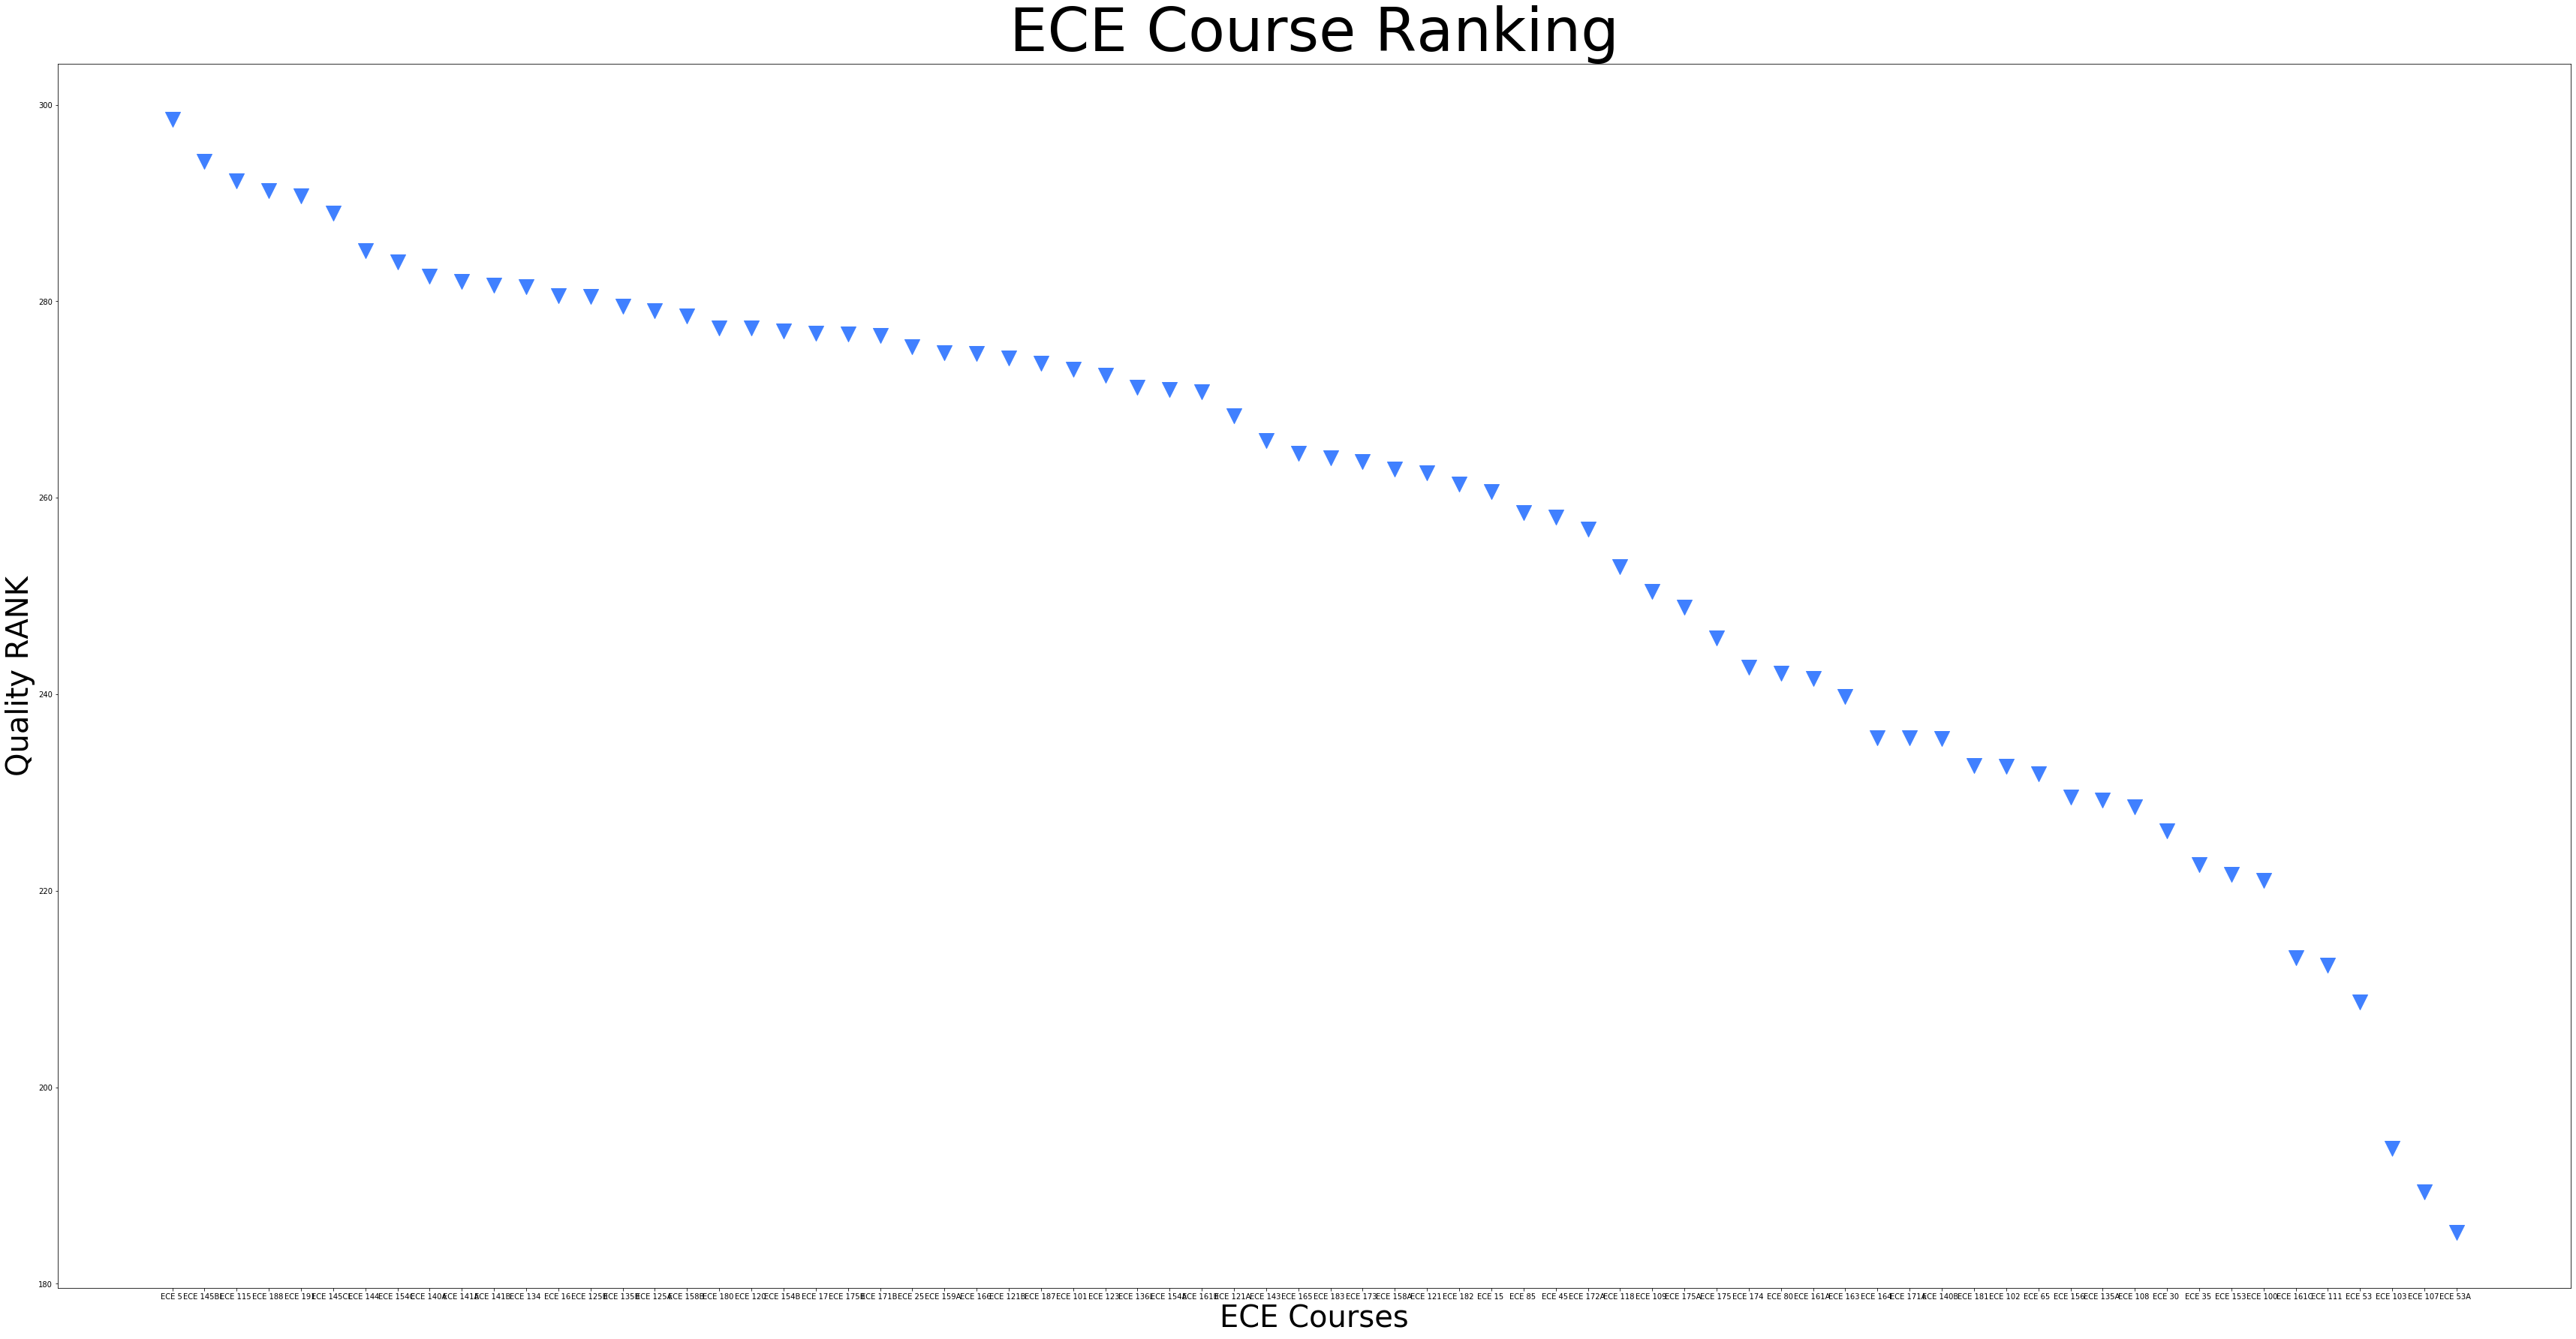

In [3]:
fig = plt.figure(figsize=(60, 30))
ece_x = fig.add_subplot(111)
ece_x = ece_courses_with_highest_evaluations_df["Course Number"]
ece_y = ece_courses_with_highest_evaluations_df["final sum"]
colors = (0.25,0.5,1)
plt.scatter(ece_x, ece_y, s=400, c=colors, marker = "v", alpha=1)
plt.autoscale(enable=True, axis='x', tight=False)
plt.title('ECE Course Ranking', fontsize=80)
plt.xlabel('ECE Courses', fontsize=40)
plt.ylabel('Quality RANK', fontsize=40)
plt.savefig('Question1_ECE.jpg')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


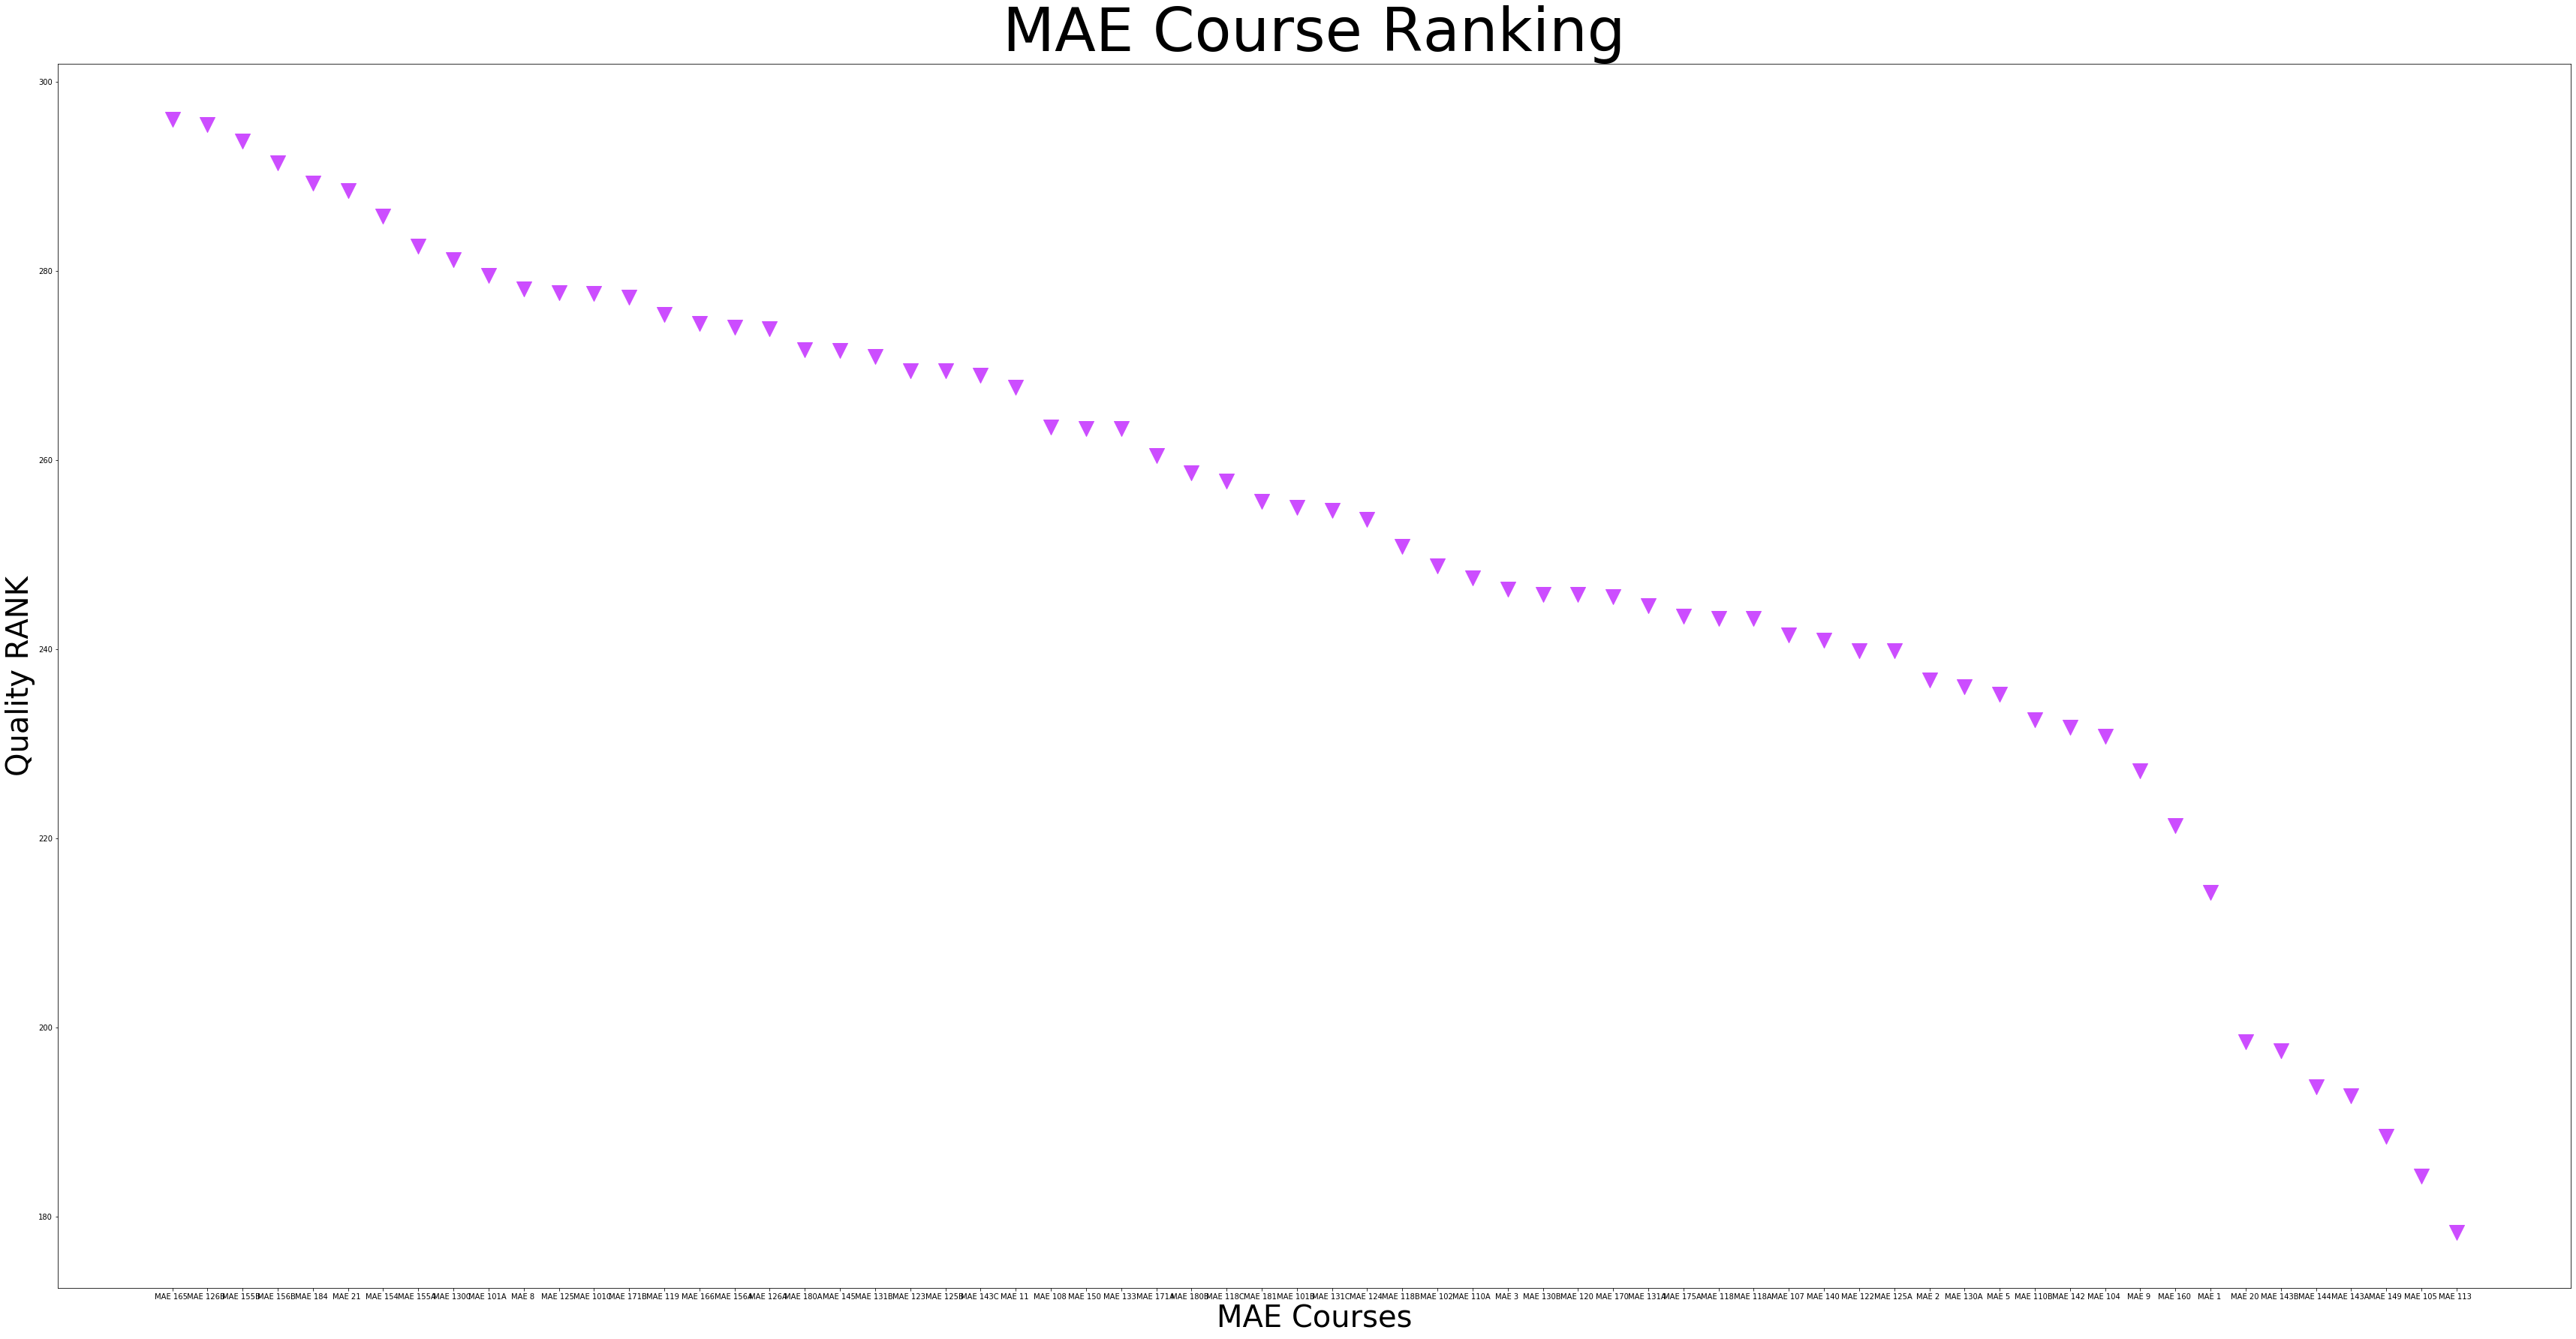

In [5]:
fig = plt.figure(figsize=(60, 30))
mae_x = fig.add_subplot(111)
mae_x = mae_courses_with_highest_evaluations_df["Course Number"]
mae_y = mae_courses_with_highest_evaluations_df["final sum"]
colors = (0.8,0.3,1)
plt.scatter(mae_x, mae_y, s=400, marker="v" ,c=colors, alpha=1)
plt.autoscale(enable=True, axis='x', tight=False)
plt.title('MAE Course Ranking', fontsize=80)
plt.xlabel('MAE Courses', fontsize=40)
plt.ylabel('Quality RANK', fontsize=40)
plt.savefig('Question1_MAE.jpg')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


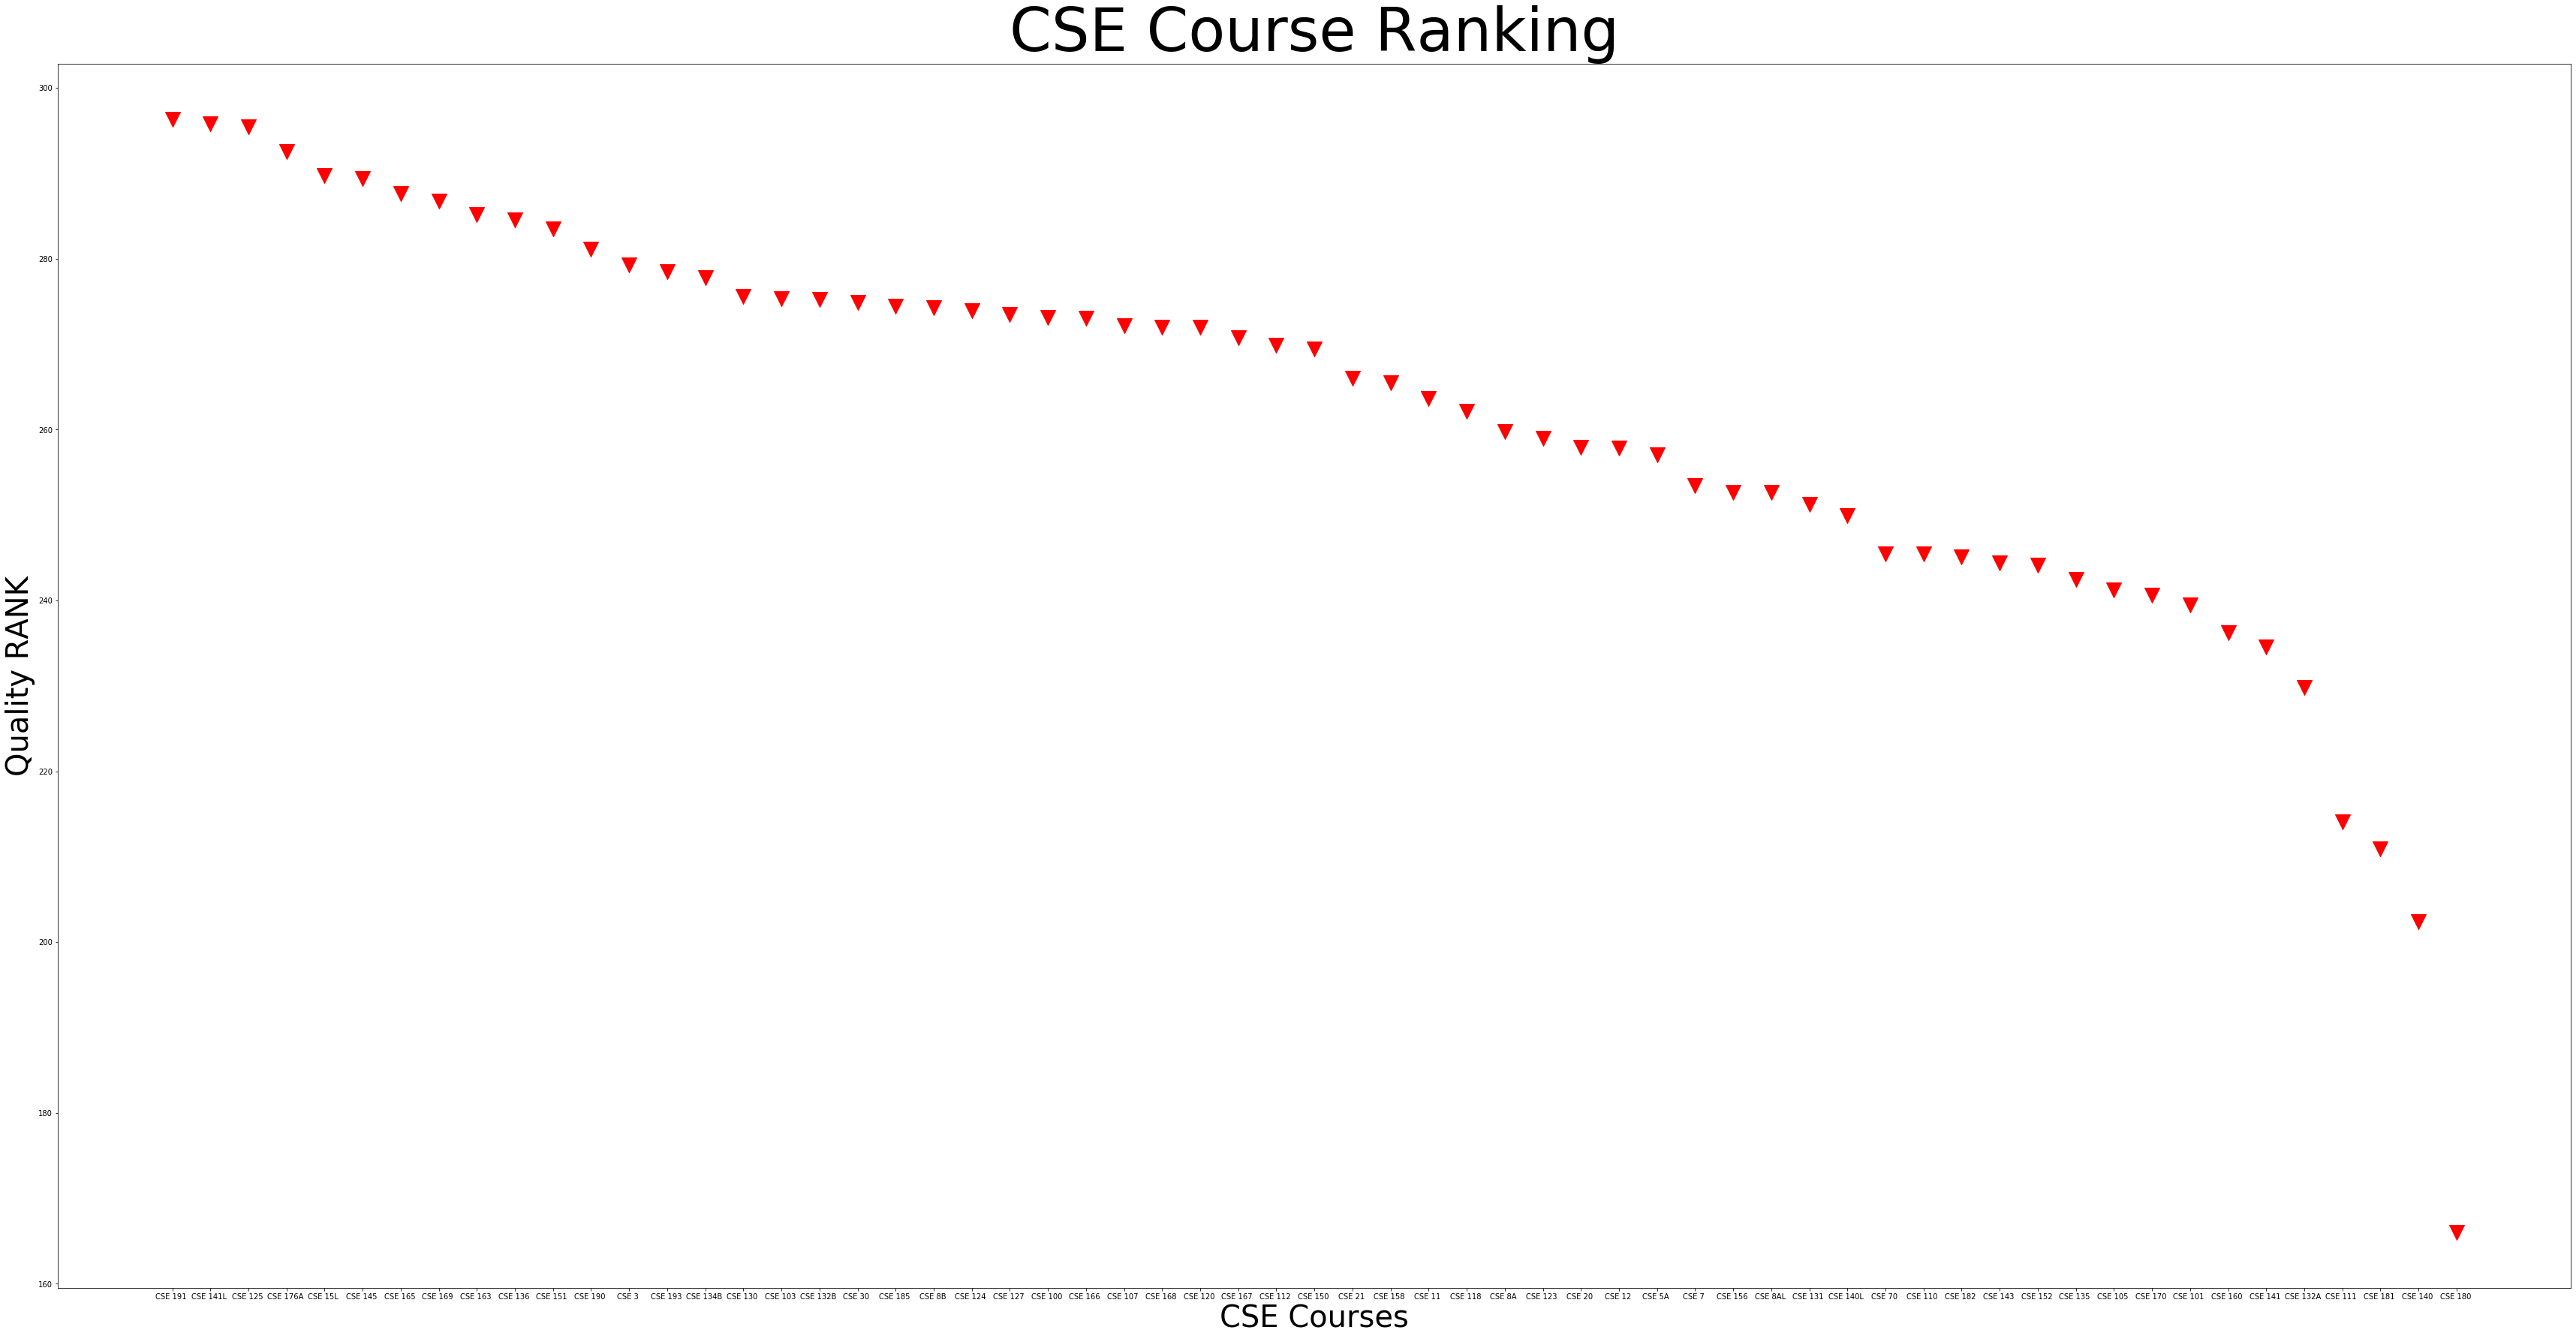

In [6]:
fig = plt.figure(figsize=(60, 30))
cse_x = fig.add_subplot(111)
cse_x = cse_courses_with_highest_evaluations_df["Course Number"]
cse_y = cse_courses_with_highest_evaluations_df["final sum"]
colors = (1,0,0)
plt.scatter(cse_x, cse_y, s=400, marker = "v", c=colors, alpha=1)
plt.autoscale(enable=True, axis='x', tight=False)
plt.title('CSE Course Ranking', fontsize=80)
plt.xlabel('CSE Courses', fontsize=40)
plt.ylabel('Quality RANK', fontsize=40)
plt.savefig('Question1_CSE.jpg')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


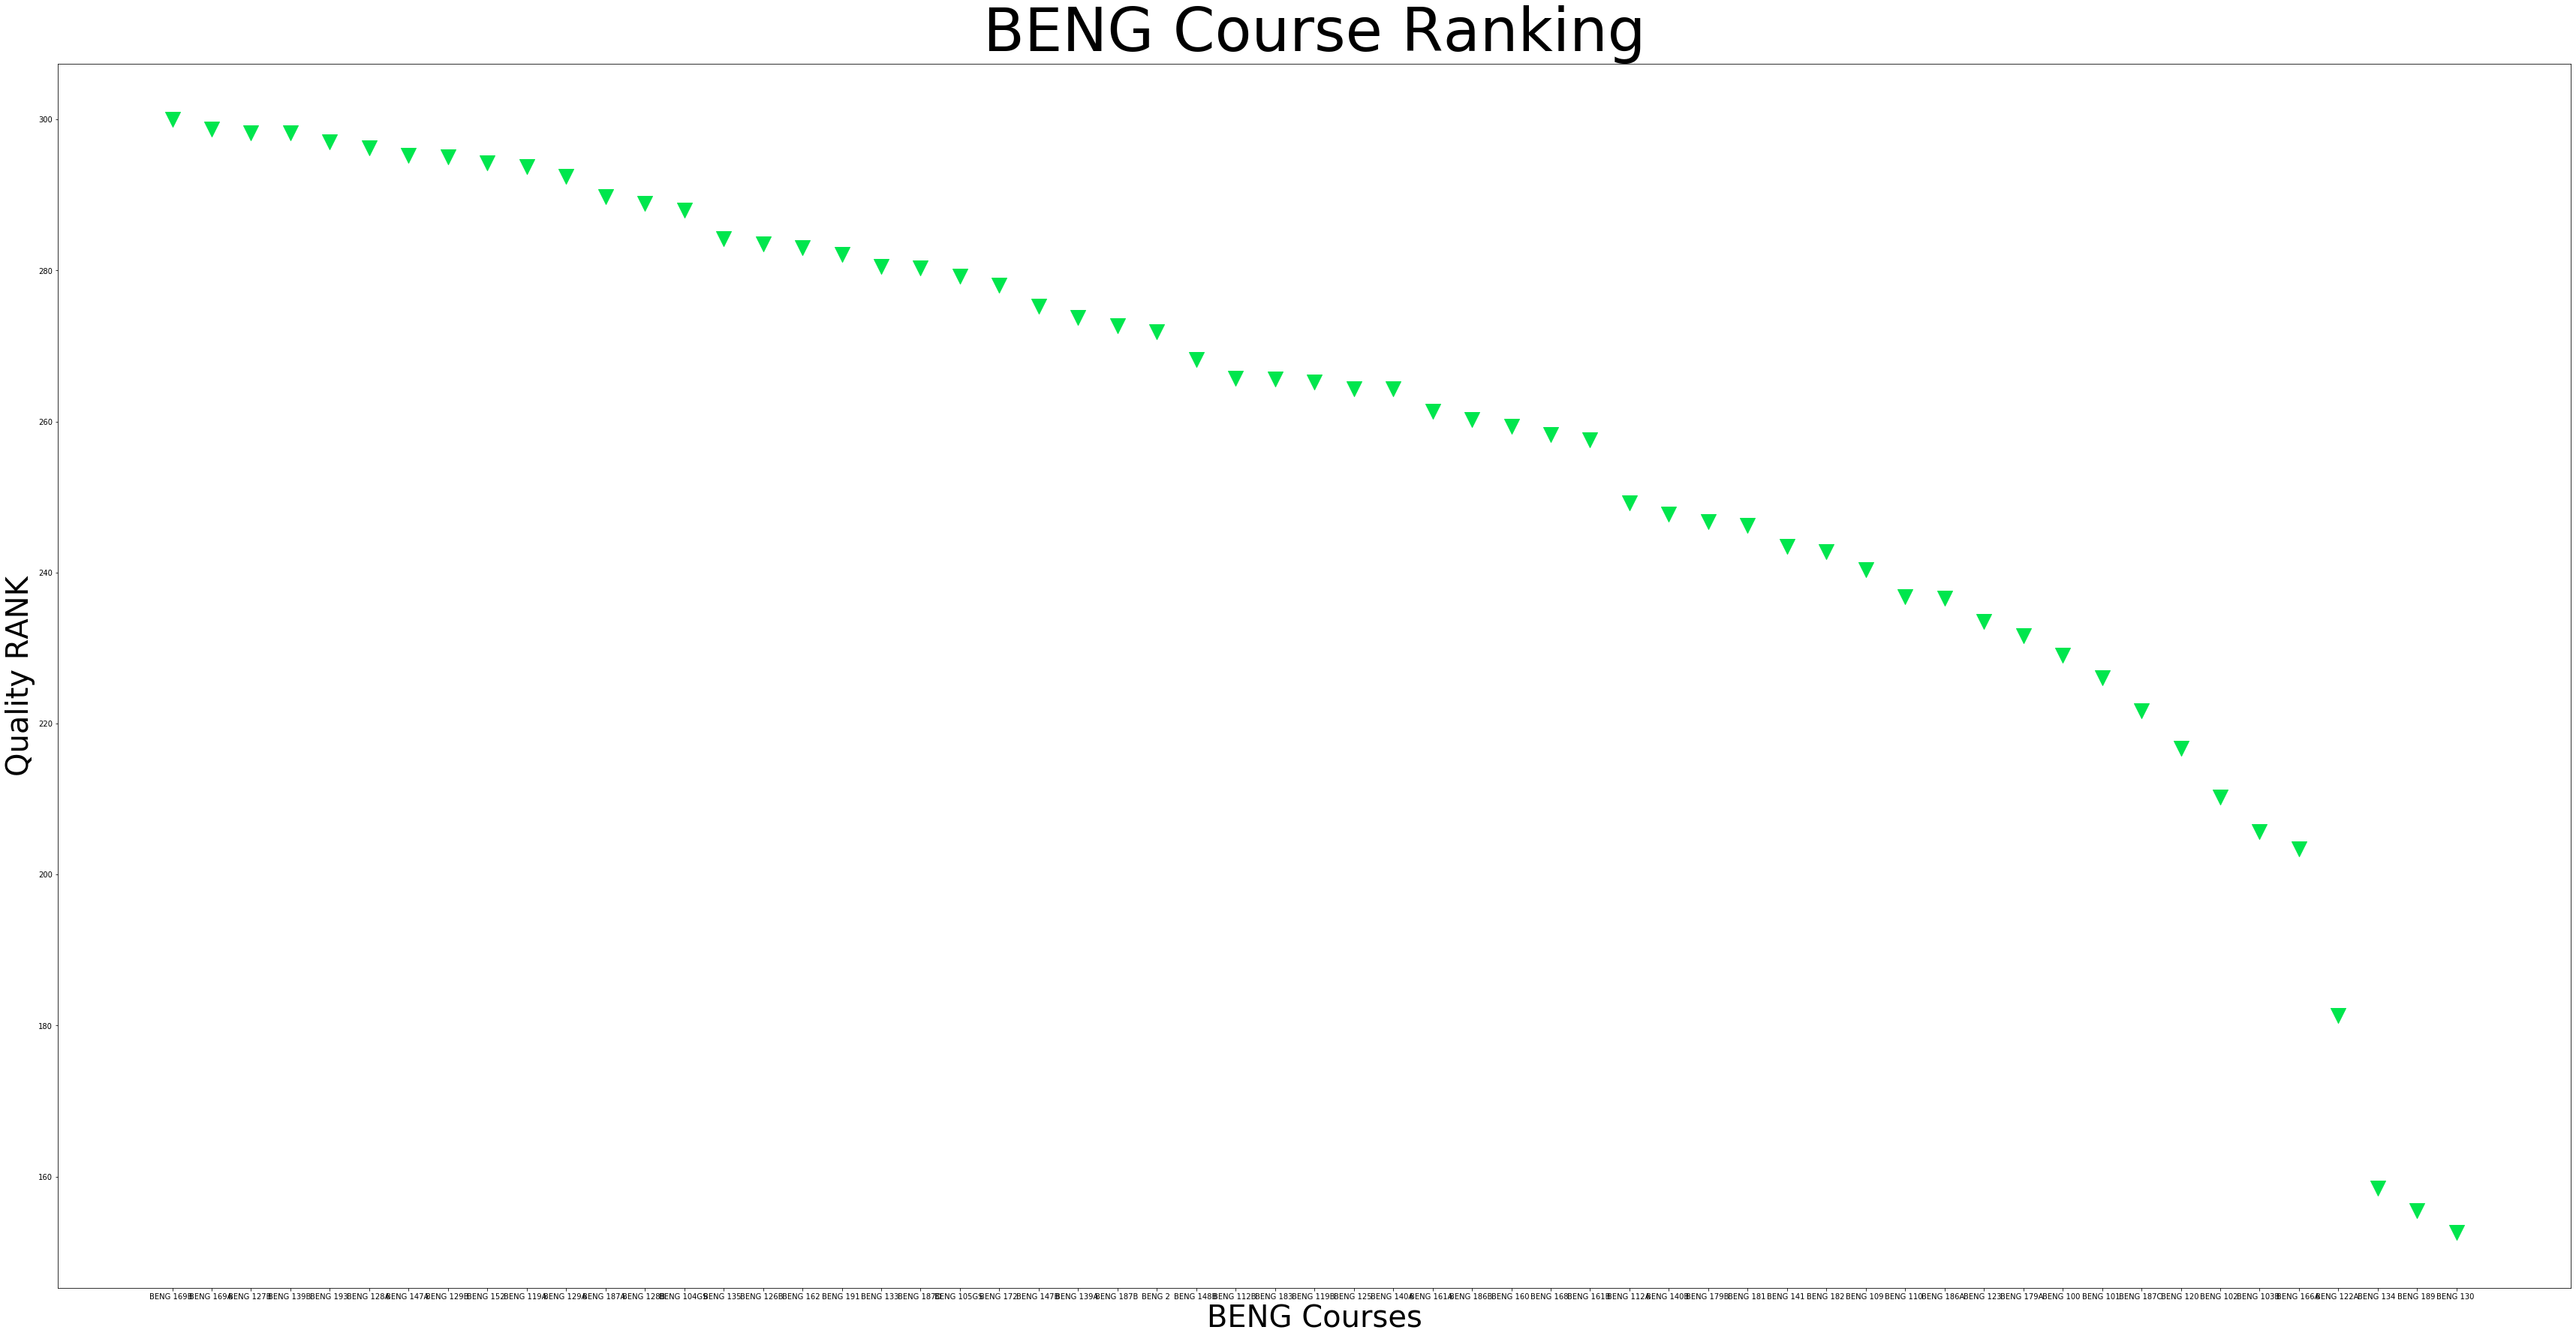

In [7]:
fig = plt.figure(figsize=(60, 30))
beng_x = fig.add_subplot(111)
beng_x = beng_courses_with_highest_evaluations_df["Course Number"]
beng_y = beng_courses_with_highest_evaluations_df["final sum"]
colors = (0,0.9,0.3)
plt.scatter(beng_x, beng_y, s=400, c=colors, marker="v", alpha=1)
plt.autoscale(enable=True, axis='x', tight=False)
plt.title('BENG Course Ranking', fontsize=80)
plt.xlabel('BENG Courses', fontsize=40)
plt.ylabel('Quality RANK', fontsize=40)
plt.savefig('Question1_BENG.jpg')
plt.show()

## Question 2
How consistant are the expected grades and received grades in each department

In [10]:
import pandas as pd 
import numpy as np 

#import the combined dataframe
combined_df = pd.read_csv("Preprocess_Completed.csv")
combined_df.set_index(["Department"], inplace=True)

#seperate the dataframes based on the departments
ece_df = combined_df.loc["ECE"]
cse_df = combined_df.loc["CSE"]
mae_df = combined_df.loc["MAE"]
beng_df = combined_df.loc["BENG"]

#reset the index for all the combined dataframes
ece_df.reset_index(inplace=True)
cse_df.reset_index(inplace=True)
mae_df.reset_index(inplace=True)
beng_df.reset_index(inplace=True)

#create new column to hold all the grades expected to grades received ratio for eachd department
ece_df["Final Grade Ratio"] = ece_df["Avg Grade Received"]/ece_df["Avg Grade Expected"]
cse_df["Final Grade Ratio"] = cse_df["Avg Grade Received"]/cse_df["Avg Grade Expected"]
mae_df["Final Grade Ratio"] = mae_df["Avg Grade Received"]/mae_df["Avg Grade Expected"]
beng_df["Final Grade Ratio"] = beng_df["Avg Grade Received"]/beng_df["Avg Grade Expected"]

#cerate groups based on the unique course numbers
ece_course_group = ece_df.groupby(["Course Number"])
cse_course_group = cse_df.groupby(["Course Number"])
mae_course_group = mae_df.groupby(["Course Number"])
beng_course_group = beng_df.groupby(["Course Number"])

#create new dataframes with same columns to store the averaged out results for each group
averged_out_ece_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])
averged_out_cse_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])
averged_out_mae_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])
averged_out_beng_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])

#create dictionaries and lists to hold the results for avergae values for each department
#for ece
average_enrolled_ece_dict = {}
average_grade_expected_ece_dict = {}
average_grade_receieved_ece_dict = {}
average_hours_studied_ece_dict = {}
ece_course_name = []
ece_total_enrolled = []

#for cse
average_enrolled_cse_dict = {}
average_grade_expected_cse_dict = {}
average_grade_receieved_cse_dict = {}
average_hours_studied_cse_dict = {}
cse_course_name = []
cse_total_enrolled = []

#for mae
average_enrolled_mae_dict = {}
average_grade_expected_mae_dict = {}
average_grade_receieved_mae_dict = {}
average_hours_studied_mae_dict = {}
mae_course_name = []
mae_total_enrolled = []

#for beng
average_enrolled_beng_dict = {}
average_grade_expected_beng_dict = {}
average_grade_receieved_beng_dict = {}
average_hours_studied_beng_dict = {}
beng_course_name = []
beng_total_enrolled = []


#get the averge for each column in each group - This will give us an averaged out column for hours studied,
# grades receieved and expected and total entrolled students for each unique course in the dataset
#for ece
for course, data in ece_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_ece_dict[course] = total_enrolled_val
    average_grade_receieved_ece_dict[course] = average_grade_per_course_receieved
    average_grade_expected_ece_dict[course] = average_grade_per_course_expected
    average_hours_studied_ece_dict[course] = average_hours_studied 

ece_course_name = average_enrolled_ece_dict.keys()
ece_total_enrolled = average_enrolled_ece_dict.values()
ece_average_grade_expected = average_grade_expected_ece_dict.values()
ece_average_grade_receieved = average_grade_receieved_ece_dict.values()
ece_average_hours_studied = average_hours_studied_ece_dict.values()

averged_out_ece_unique_course_df["Course"] = ece_course_name
averged_out_ece_unique_course_df["Total Enrolled"] = ece_total_enrolled
averged_out_ece_unique_course_df["Avrg Grade Expected"] = ece_average_grade_expected
averged_out_ece_unique_course_df["Avrg Grade Received"] = ece_average_grade_receieved
averged_out_ece_unique_course_df["Average Hours Studied"] = ece_average_hours_studied

#for cse
for course, data in cse_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_cse_dict[course] = total_enrolled_val
    average_grade_receieved_cse_dict[course] = average_grade_per_course_receieved
    average_grade_expected_cse_dict[course] = average_grade_per_course_expected
    average_hours_studied_cse_dict[course] = average_hours_studied 

cse_course_name = average_enrolled_cse_dict.keys()
cse_total_enrolled = average_enrolled_cse_dict.values()
cse_average_grade_expected = average_grade_expected_cse_dict.values()
cse_average_grade_receieved = average_grade_receieved_cse_dict.values()
cse_average_hours_studied = average_hours_studied_cse_dict.values()

averged_out_cse_unique_course_df["Course"] = cse_course_name
averged_out_cse_unique_course_df["Total Enrolled"] = cse_total_enrolled
averged_out_cse_unique_course_df["Avrg Grade Expected"] = cse_average_grade_expected
averged_out_cse_unique_course_df["Avrg Grade Received"] = cse_average_grade_receieved
averged_out_cse_unique_course_df["Average Hours Studied"] = cse_average_hours_studied

#for mae
for course, data in mae_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_mae_dict[course] = total_enrolled_val
    average_grade_receieved_mae_dict[course] = average_grade_per_course_receieved
    average_grade_expected_mae_dict[course] = average_grade_per_course_expected
    average_hours_studied_mae_dict[course] = average_hours_studied 

mae_course_name = average_enrolled_mae_dict.keys()
mae_total_enrolled = average_enrolled_mae_dict.values()
mae_average_grade_expected = average_grade_expected_mae_dict.values()
mae_average_grade_receieved = average_grade_receieved_mae_dict.values()
mae_average_hours_studied = average_hours_studied_mae_dict.values()

averged_out_mae_unique_course_df["Course"] = mae_course_name
averged_out_mae_unique_course_df["Total Enrolled"] = mae_total_enrolled
averged_out_mae_unique_course_df["Avrg Grade Expected"] = mae_average_grade_expected
averged_out_mae_unique_course_df["Avrg Grade Received"] = mae_average_grade_receieved
averged_out_mae_unique_course_df["Average Hours Studied"] = mae_average_hours_studied

#for beng
for course, data in beng_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_beng_dict[course] = total_enrolled_val
    average_grade_receieved_beng_dict[course] = average_grade_per_course_receieved
    average_grade_expected_beng_dict[course] = average_grade_per_course_expected
    average_hours_studied_beng_dict[course] = average_hours_studied 

beng_course_name = average_enrolled_beng_dict.keys()
beng_total_enrolled = average_enrolled_beng_dict.values()
beng_average_grade_expected = average_grade_expected_beng_dict.values()
beng_average_grade_receieved = average_grade_receieved_beng_dict.values()
beng_average_hours_studied = average_hours_studied_beng_dict.values()

averged_out_beng_unique_course_df["Course"] = beng_course_name
averged_out_beng_unique_course_df["Total Enrolled"] = beng_total_enrolled
averged_out_beng_unique_course_df["Avrg Grade Expected"] = beng_average_grade_expected
averged_out_beng_unique_course_df["Avrg Grade Received"] = beng_average_grade_receieved
averged_out_beng_unique_course_df["Average Hours Studied"] = beng_average_hours_studied


#divide the averged out grades received by grades expected; this will give us a good frame of reference to see consistency of the grades
averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_ece_unique_course_df["Avrg Grade Received"]/averged_out_ece_unique_course_df["Avrg Grade Expected"] 
averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_cse_unique_course_df["Avrg Grade Received"]/averged_out_cse_unique_course_df["Avrg Grade Expected"] 
averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_mae_unique_course_df["Avrg Grade Received"]/averged_out_mae_unique_course_df["Avrg Grade Expected"] 
averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_beng_unique_course_df["Avrg Grade Received"]/averged_out_beng_unique_course_df["Avrg Grade Expected"] 

#find mean and vairance for the ratio column to extract the most consistent grades overall
#ece
ece_mean_grade_ratio_val = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
ece_var_grade_ratio_val = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"].std()
ece_consistancy_upper_range = ece_mean_grade_ratio_val + ece_var_grade_ratio_val
ece_consistancy_lower_range = ece_mean_grade_ratio_val - ece_var_grade_ratio_val
consistency_range_mask_ece = (averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] < ece_consistancy_upper_range) & (averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] > ece_consistancy_lower_range )
lower_than_consistancy_mask_ece = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] < ece_consistancy_lower_range
higher_than_consistancy_mask_ece = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] > ece_consistancy_upper_range
most_consistant_ece_course_df = averged_out_ece_unique_course_df[consistency_range_mask_ece]
least_consistant_low_grade_df = averged_out_ece_unique_course_df[lower_than_consistancy_mask_ece]
least_consistant_high_grade_df = averged_out_ece_unique_course_df[higher_than_consistancy_mask_ece]
ece_course_percentage_goal_consistancy_percentage = (len(most_consistant_ece_course_df) / len(averged_out_ece_unique_course_df)) *100
ece_course_percentage_low_consistancy_percentage = (len(least_consistant_low_grade_df) / len(averged_out_ece_unique_course_df)) *100
ece_course_percentage_high_consistancy_percentage = (len(least_consistant_high_grade_df) / len(averged_out_ece_unique_course_df)) *100

#cse
cse_mean_grade_ratio_val = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
cse_var_grade_ratio_val = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"].std()
cse_consistancy_upper_range = cse_mean_grade_ratio_val + cse_var_grade_ratio_val
cse_consistancy_lower_range = cse_mean_grade_ratio_val - cse_var_grade_ratio_val
consistency_range_mask_cse = (averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] < cse_consistancy_upper_range) & (averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] > cse_consistancy_lower_range )
lower_than_consistancy_mask_cse = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] < cse_consistancy_lower_range
higher_than_consistancy_mask_cse = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] > cse_consistancy_upper_range
most_consistant_ece_course_df_cse = averged_out_cse_unique_course_df[consistency_range_mask_cse]
least_consistant_low_grade_df_cse = averged_out_cse_unique_course_df[lower_than_consistancy_mask_cse]
least_consistant_high_grade_df_cse = averged_out_cse_unique_course_df[higher_than_consistancy_mask_cse]
cse_course_percentage_goal_consistancy_percentage = (len(most_consistant_ece_course_df_cse) / len(averged_out_cse_unique_course_df)) *100
cse_course_percentage_low_consistancy_percentage = (len(least_consistant_low_grade_df_cse) / len(averged_out_cse_unique_course_df)) *100
cse_course_percentage_high_consistancy_percentage = (len(least_consistant_high_grade_df_cse) / len(averged_out_cse_unique_course_df)) *100

# mae
mae_mean_grade_ratio_val = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
mae_var_grade_ratio_val = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"].std()
mae_consistancy_upper_range = mae_mean_grade_ratio_val + mae_var_grade_ratio_val
mae_consistancy_lower_range = mae_mean_grade_ratio_val - mae_var_grade_ratio_val
consistency_range_mask_mae = (averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] < mae_consistancy_upper_range) & (averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] > mae_consistancy_lower_range )
lower_than_consistancy_mask_mae = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] < mae_consistancy_lower_range
higher_than_consistancy_mask_mae = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] > mae_consistancy_upper_range
most_consistant_ece_course_df_mae = averged_out_mae_unique_course_df[consistency_range_mask_mae]
least_consistant_low_grade_df_mae = averged_out_mae_unique_course_df[lower_than_consistancy_mask_mae]
least_consistant_high_grade_df_mae = averged_out_mae_unique_course_df[higher_than_consistancy_mask_mae]
mae_course_percentage_goal_consistancy_percentage = (len(most_consistant_ece_course_df_mae) / len(averged_out_mae_unique_course_df)) *100
mae_course_percentage_low_consistancy_percentage = (len(least_consistant_low_grade_df_mae) / len(averged_out_mae_unique_course_df)) *100
mae_course_percentage_high_consistancy_percentage = (len(least_consistant_high_grade_df_mae) / len(averged_out_mae_unique_course_df)) *100

#beng
beng_mean_grade_ratio_val = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
beng_var_grade_ratio_val = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"].std()
beng_consistancy_upper_range = beng_mean_grade_ratio_val + beng_var_grade_ratio_val
beng_consistancy_lower_range = beng_mean_grade_ratio_val - beng_var_grade_ratio_val
consistency_range_mask_beng = (averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] < beng_consistancy_upper_range) & (averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] > beng_consistancy_lower_range )
lower_than_consistancy_mask_beng = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] < beng_consistancy_lower_range
higher_than_consistancy_mask_beng = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] > beng_consistancy_upper_range
most_consistant_ece_course_df_beng = averged_out_beng_unique_course_df[consistency_range_mask_beng]
least_consistant_low_grade_df_beng = averged_out_beng_unique_course_df[lower_than_consistancy_mask_beng]
least_consistant_high_grade_df_beng = averged_out_beng_unique_course_df[higher_than_consistancy_mask_beng]
beng_course_percentage_goal_consistancy_percentage = (len(most_consistant_ece_course_df_beng) / len(averged_out_beng_unique_course_df)) *100
beng_course_percentage_low_consistancy_percentage = (len(least_consistant_low_grade_df_beng) / len(averged_out_beng_unique_course_df)) *100
beng_course_percentage_high_consistancy_percentage = (len(least_consistant_high_grade_df_beng) / len(averged_out_beng_unique_course_df)) *100


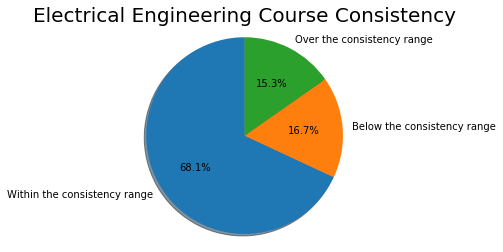

In [11]:
ece_pie_plot_sizes = [ece_course_percentage_goal_consistancy_percentage, ece_course_percentage_low_consistancy_percentage,ece_course_percentage_high_consistancy_percentage]
ece_pie_plot_labels = ['Within the consistency range', 'Below the consistency range', 'Over the consistency range']
fig1, ax1 = plt.subplots()
ax1.pie(ece_pie_plot_sizes, labels=ece_pie_plot_labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Electrical Engineering Course Consistency', fontsize=20)
plt.savefig('Question2_ECE.jpg')
plt.show()

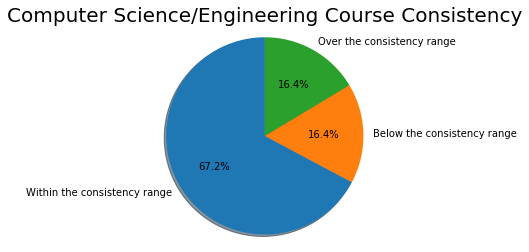

In [12]:
cse_pie_plot_sizes = [cse_course_percentage_goal_consistancy_percentage, cse_course_percentage_low_consistancy_percentage,cse_course_percentage_high_consistancy_percentage]
cse_pie_plot_labels = ['Within the consistency range', 'Below the consistency range', 'Over the consistency range']
fig1, ax1 = plt.subplots()
ax1.pie(cse_pie_plot_sizes, labels=cse_pie_plot_labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Computer Science/Engineering Course Consistency', fontsize=20)
plt.savefig('Question2_CSE.jpg')
plt.show()

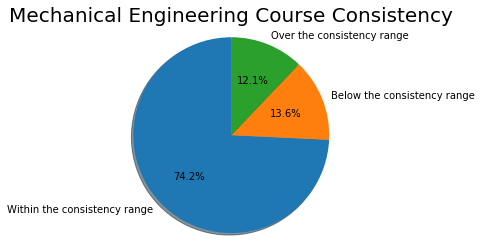

In [13]:
mae_pie_plot_sizes = [mae_course_percentage_goal_consistancy_percentage, mae_course_percentage_low_consistancy_percentage,mae_course_percentage_high_consistancy_percentage]
mae_pie_plot_labels = ['Within the consistency range', 'Below the consistency range', 'Over the consistency range']
fig1, ax1 = plt.subplots()
ax1.pie(mae_pie_plot_sizes, labels=mae_pie_plot_labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Mechanical Engineering Course Consistency', fontsize=20)
plt.savefig('Question2_MAE.jpg')
plt.show()

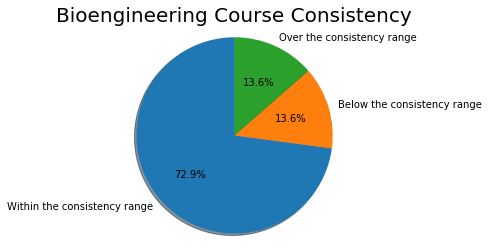

In [14]:
beng_pie_plot_sizes = [beng_course_percentage_goal_consistancy_percentage, beng_course_percentage_low_consistancy_percentage,beng_course_percentage_high_consistancy_percentage]
beng_pie_plot_labels = ['Within the consistency range', 'Below the consistency range', 'Over the consistency range']
fig1, ax1 = plt.subplots()
ax1.pie(beng_pie_plot_sizes, labels=beng_pie_plot_labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Bioengineering Course Consistency', fontsize=20)
plt.savefig('Question2_BENG.jpg')
plt.show()


## Question 3
What are the courses with most variance in grades in each department? Taking into consideration hours studied,professor, and class sizes.

In [16]:
import pandas as pd 
import numpy as np 

#import the combined dataframe
combined_df = pd.read_csv("Preprocess_Completed.csv")
combined_df.set_index(["Department"], inplace=True)

#seperate the dataframes based on the departments
ece_df = combined_df.loc["ECE"]
cse_df = combined_df.loc["CSE"]
mae_df = combined_df.loc["MAE"]
beng_df = combined_df.loc["BENG"]

#reset the index for all the combined dataframes
ece_df.reset_index(inplace=True)
cse_df.reset_index(inplace=True)
mae_df.reset_index(inplace=True)
beng_df.reset_index(inplace=True)

#create new column to hold all the grades expected to grades received ratio for eachd department
ece_df["Final Grade Ratio"] = ece_df["Avg Grade Received"]/ece_df["Avg Grade Expected"]
cse_df["Final Grade Ratio"] = cse_df["Avg Grade Received"]/cse_df["Avg Grade Expected"]
mae_df["Final Grade Ratio"] = mae_df["Avg Grade Received"]/mae_df["Avg Grade Expected"]
beng_df["Final Grade Ratio"] = beng_df["Avg Grade Received"]/beng_df["Avg Grade Expected"]

#cerate groups based on the unique course numbers
ece_course_group = ece_df.groupby(["Course Number"])
cse_course_group = cse_df.groupby(["Course Number"])
mae_course_group = mae_df.groupby(["Course Number"])
beng_course_group = beng_df.groupby(["Course Number"])

#create new dataframes with same columns to store the averaged out results for each group
averged_out_ece_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])
averged_out_cse_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])
averged_out_mae_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])
averged_out_beng_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])

#create dictionaries and lists to hold the results for avergae values for each department
#for ece
average_enrolled_ece_dict = {}
average_grade_expected_ece_dict = {}
average_grade_receieved_ece_dict = {}
average_hours_studied_ece_dict = {}
ece_course_name = []
ece_total_enrolled = []

#for cse
average_enrolled_cse_dict = {}
average_grade_expected_cse_dict = {}
average_grade_receieved_cse_dict = {}
average_hours_studied_cse_dict = {}
cse_course_name = []
cse_total_enrolled = []

#for mae
average_enrolled_mae_dict = {}
average_grade_expected_mae_dict = {}
average_grade_receieved_mae_dict = {}
average_hours_studied_mae_dict = {}
mae_course_name = []
mae_total_enrolled = []

#for beng
average_enrolled_beng_dict = {}
average_grade_expected_beng_dict = {}
average_grade_receieved_beng_dict = {}
average_hours_studied_beng_dict = {}
beng_course_name = []
beng_total_enrolled = []


#get the averge for each column in each group - This will give us an averaged out column for hours studied,
# grades receieved and expected and total entrolled students for each unique course in the dataset
#for ece
for course, data in ece_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_ece_dict[course] = total_enrolled_val
    average_grade_receieved_ece_dict[course] = average_grade_per_course_receieved
    average_grade_expected_ece_dict[course] = average_grade_per_course_expected
    average_hours_studied_ece_dict[course] = average_hours_studied 

ece_course_name = average_enrolled_ece_dict.keys()
ece_total_enrolled = average_enrolled_ece_dict.values()
ece_average_grade_expected = average_grade_expected_ece_dict.values()
ece_average_grade_receieved = average_grade_receieved_ece_dict.values()
ece_average_hours_studied = average_hours_studied_ece_dict.values()

averged_out_ece_unique_course_df["Course"] = ece_course_name
averged_out_ece_unique_course_df["Total Enrolled"] = ece_total_enrolled
averged_out_ece_unique_course_df["Avrg Grade Expected"] = ece_average_grade_expected
averged_out_ece_unique_course_df["Avrg Grade Received"] = ece_average_grade_receieved
averged_out_ece_unique_course_df["Average Hours Studied"] = ece_average_hours_studied

#for cse
for course, data in cse_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_cse_dict[course] = total_enrolled_val
    average_grade_receieved_cse_dict[course] = average_grade_per_course_receieved
    average_grade_expected_cse_dict[course] = average_grade_per_course_expected
    average_hours_studied_cse_dict[course] = average_hours_studied 

cse_course_name = average_enrolled_cse_dict.keys()
cse_total_enrolled = average_enrolled_cse_dict.values()
cse_average_grade_expected = average_grade_expected_cse_dict.values()
cse_average_grade_receieved = average_grade_receieved_cse_dict.values()
cse_average_hours_studied = average_hours_studied_cse_dict.values()

averged_out_cse_unique_course_df["Course"] = cse_course_name
averged_out_cse_unique_course_df["Total Enrolled"] = cse_total_enrolled
averged_out_cse_unique_course_df["Avrg Grade Expected"] = cse_average_grade_expected
averged_out_cse_unique_course_df["Avrg Grade Received"] = cse_average_grade_receieved
averged_out_cse_unique_course_df["Average Hours Studied"] = cse_average_hours_studied

#for mae
for course, data in mae_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_mae_dict[course] = total_enrolled_val
    average_grade_receieved_mae_dict[course] = average_grade_per_course_receieved
    average_grade_expected_mae_dict[course] = average_grade_per_course_expected
    average_hours_studied_mae_dict[course] = average_hours_studied 

mae_course_name = average_enrolled_mae_dict.keys()
mae_total_enrolled = average_enrolled_mae_dict.values()
mae_average_grade_expected = average_grade_expected_mae_dict.values()
mae_average_grade_receieved = average_grade_receieved_mae_dict.values()
mae_average_hours_studied = average_hours_studied_mae_dict.values()

averged_out_mae_unique_course_df["Course"] = mae_course_name
averged_out_mae_unique_course_df["Total Enrolled"] = mae_total_enrolled
averged_out_mae_unique_course_df["Avrg Grade Expected"] = mae_average_grade_expected
averged_out_mae_unique_course_df["Avrg Grade Received"] = mae_average_grade_receieved
averged_out_mae_unique_course_df["Average Hours Studied"] = mae_average_hours_studied

#for beng
for course, data in beng_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_beng_dict[course] = total_enrolled_val
    average_grade_receieved_beng_dict[course] = average_grade_per_course_receieved
    average_grade_expected_beng_dict[course] = average_grade_per_course_expected
    average_hours_studied_beng_dict[course] = average_hours_studied 

beng_course_name = average_enrolled_beng_dict.keys()
beng_total_enrolled = average_enrolled_beng_dict.values()
beng_average_grade_expected = average_grade_expected_beng_dict.values()
beng_average_grade_receieved = average_grade_receieved_beng_dict.values()
beng_average_hours_studied = average_hours_studied_beng_dict.values()

averged_out_beng_unique_course_df["Course"] = beng_course_name
averged_out_beng_unique_course_df["Total Enrolled"] = beng_total_enrolled
averged_out_beng_unique_course_df["Avrg Grade Expected"] = beng_average_grade_expected
averged_out_beng_unique_course_df["Avrg Grade Received"] = beng_average_grade_receieved
averged_out_beng_unique_course_df["Average Hours Studied"] = beng_average_hours_studied


#divide the averged out grades received by grades expected; this will give us a good frame of reference to see consistency of the grades
averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_ece_unique_course_df["Avrg Grade Received"]/averged_out_ece_unique_course_df["Avrg Grade Expected"] 
averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_cse_unique_course_df["Avrg Grade Received"]/averged_out_cse_unique_course_df["Avrg Grade Expected"] 
averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_mae_unique_course_df["Avrg Grade Received"]/averged_out_mae_unique_course_df["Avrg Grade Expected"] 
averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_beng_unique_course_df["Avrg Grade Received"]/averged_out_beng_unique_course_df["Avrg Grade Expected"] 

#find mean and vairance for the ratio column to extract the most consistent grades overall
#ece
ece_mean_grade_ratio_val = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
ece_var_grade_ratio_val = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"].std()
ece_consistancy_upper_range = ece_mean_grade_ratio_val + ece_var_grade_ratio_val
ece_consistancy_lower_range = ece_mean_grade_ratio_val - ece_var_grade_ratio_val
ece_over_the_Range_mask = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] > ece_consistancy_upper_range
ece_below_the_range_mask = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] < ece_consistancy_lower_range
ece_over_the_average_df = averged_out_ece_unique_course_df[ece_over_the_Range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending =False)
ece_below_the_average_df = averged_out_ece_unique_course_df[ece_below_the_range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending=False)


#cse
cse_mean_grade_ratio_val = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
cse_var_grade_ratio_val = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"].std()
cse_consistancy_upper_range = cse_mean_grade_ratio_val + cse_var_grade_ratio_val
cse_consistancy_lower_range = cse_mean_grade_ratio_val - cse_var_grade_ratio_val
consistency_range_mask_cse = (averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] > cse_consistancy_upper_range) & (averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] < cse_consistancy_lower_range )
cse_most_variant_courses_df = averged_out_cse_unique_course_df[consistency_range_mask_cse]
cse_over_the_Range_mask = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] > cse_consistancy_upper_range
cse_below_the_range_mask = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] < cse_consistancy_lower_range
cse_over_the_average_df = averged_out_cse_unique_course_df[cse_over_the_Range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending =False)
cse_below_the_average_df = averged_out_cse_unique_course_df[cse_below_the_range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending=False)



# mae
mae_mean_grade_ratio_val = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
mae_var_grade_ratio_val = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"].std()
mae_consistancy_upper_range = mae_mean_grade_ratio_val + mae_var_grade_ratio_val
mae_consistancy_lower_range = mae_mean_grade_ratio_val - mae_var_grade_ratio_val
consistency_range_mask_mae = (averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] > mae_consistancy_upper_range) & (averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] < mae_consistancy_lower_range )
mae_most_variant_courses_df = averged_out_mae_unique_course_df[consistency_range_mask_mae]
mae_over_the_Range_mask = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] > mae_consistancy_upper_range
mae_below_the_range_mask = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] < mae_consistancy_lower_range
mae_over_the_average_df = averged_out_mae_unique_course_df[mae_over_the_Range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending =False)
mae_below_the_average_df = averged_out_mae_unique_course_df[mae_below_the_range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending=False)




#beng
beng_mean_grade_ratio_val = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
beng_var_grade_ratio_val = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"].std()
beng_consistancy_upper_range = beng_mean_grade_ratio_val + beng_var_grade_ratio_val
beng_consistancy_lower_range = beng_mean_grade_ratio_val - beng_var_grade_ratio_val
consistency_range_mask_beng = (averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] > beng_consistancy_upper_range) & (averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] < beng_consistancy_lower_range )
beng_most_variant_courses_df = averged_out_beng_unique_course_df[consistency_range_mask_beng]
beng_over_the_Range_mask = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] > beng_consistancy_upper_range
beng_below_the_range_mask = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] < beng_consistancy_lower_range
beng_over_the_average_df = averged_out_beng_unique_course_df[beng_over_the_Range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending =False)
beng_below_the_average_df = averged_out_beng_unique_course_df[beng_below_the_range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending=False)



Text(0, 0.5, 'Expected to receieved grade ratio')

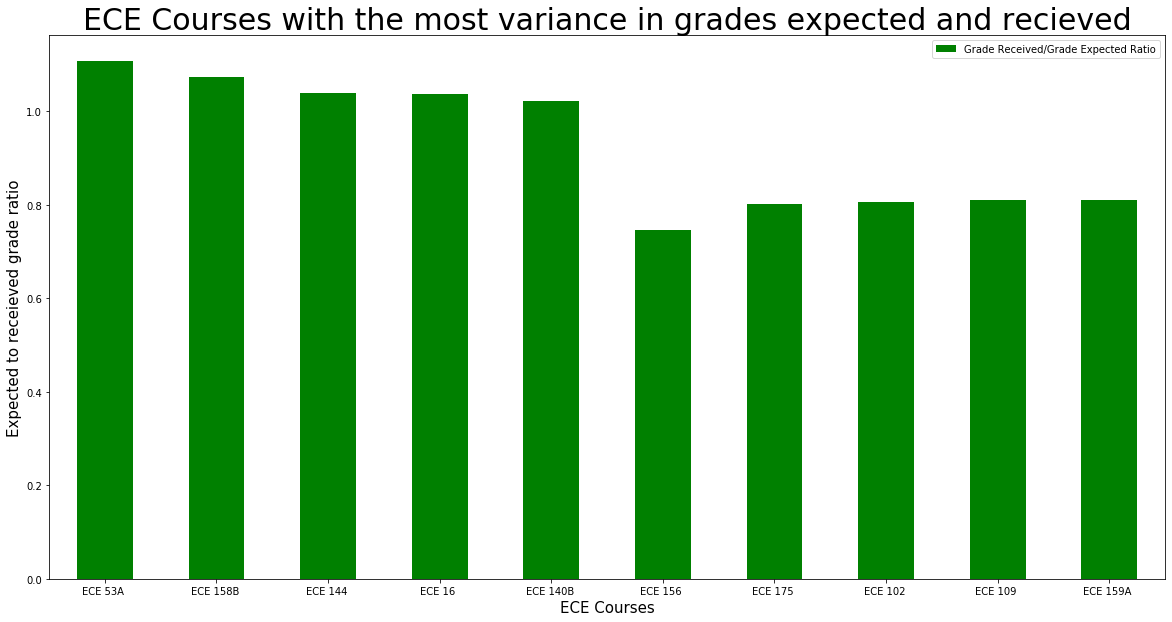

In [17]:
ece_over_the_average_df.reset_index(inplace=True)
ece_below_the_average_df.reset_index(inplace=True)
top5_ece_df = pd.DataFrame()
last5_ece_df = pd.DataFrame()
question_3_ece_df = pd.DataFrame()
a = ece_over_the_average_df.nlargest(5, "Grade Received/Grade Expected Ratio")
b = ece_below_the_average_df.nsmallest(5, "Grade Received/Grade Expected Ratio")
top5_ece_df = top5_ece_df.append(a)
last5_ece_df = last5_ece_df.append(b)
question_3_ece_df = question_3_ece_df.append(top5_ece_df)
question_3_ece_df = question_3_ece_df.append(last5_ece_df)
ax = question_3_ece_df.plot.bar(x='Course', y='Grade Received/Grade Expected Ratio', rot=0, figsize = (20,10), title='ECE Courses with the most variance in grades expected and recieved', color='green')
ax.title.set_size(30)
ax.set_xlabel('ECE Courses', fontsize=15)
ax.set_ylabel('Expected to receieved grade ratio', fontsize=15)

Text(0, 0.5, 'Expected to receieved grade ratio')

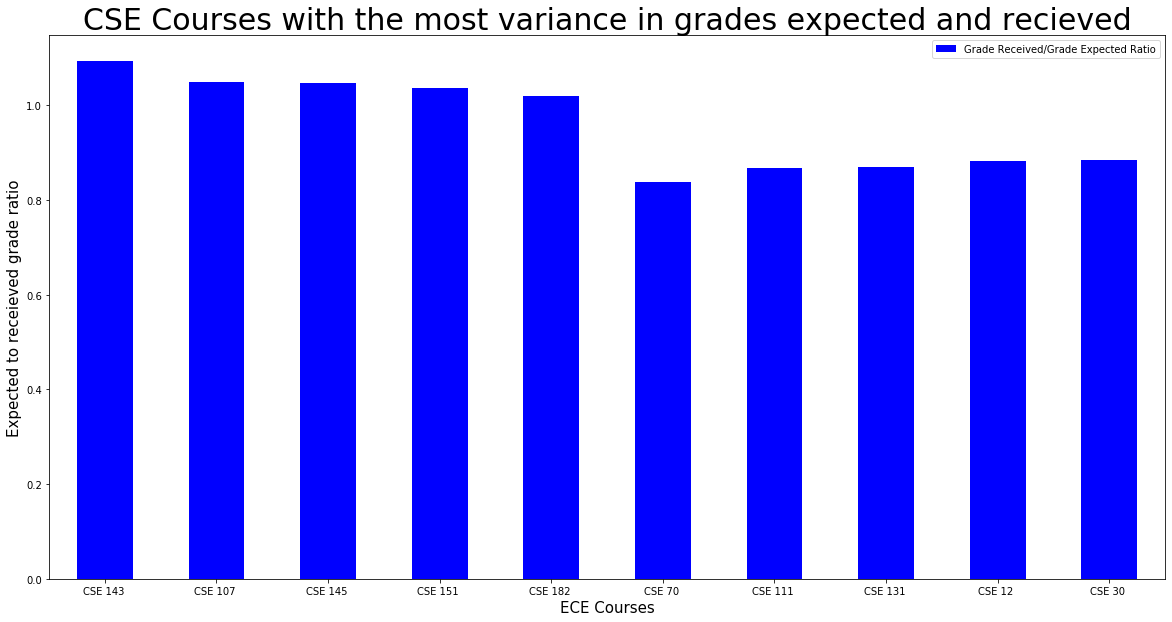

In [18]:
cse_over_the_average_df.reset_index(inplace=True)
cse_below_the_average_df.reset_index(inplace=True)
top5_cse_df = pd.DataFrame()
last5_cse_df = pd.DataFrame()
question_3_cse_df = pd.DataFrame()
c = cse_over_the_average_df.nlargest(5, "Grade Received/Grade Expected Ratio")
d = cse_below_the_average_df.nsmallest(5, "Grade Received/Grade Expected Ratio")
top5_cse_df = top5_cse_df.append(c)
last5_cse_df = last5_cse_df.append(d)
question_3_cse_df = question_3_cse_df.append(top5_cse_df)
question_3_cse_df = question_3_cse_df.append(last5_cse_df)
ax = question_3_cse_df.plot.bar(x='Course', y='Grade Received/Grade Expected Ratio', rot=0, figsize = (20,10), title='CSE Courses with the most variance in grades expected and recieved', color='blue')
ax.title.set_size(30)
ax.set_xlabel('ECE Courses', fontsize=15)
ax.set_ylabel('Expected to receieved grade ratio', fontsize=15)

Text(0, 0.5, 'Expected to receieved grade ratio')

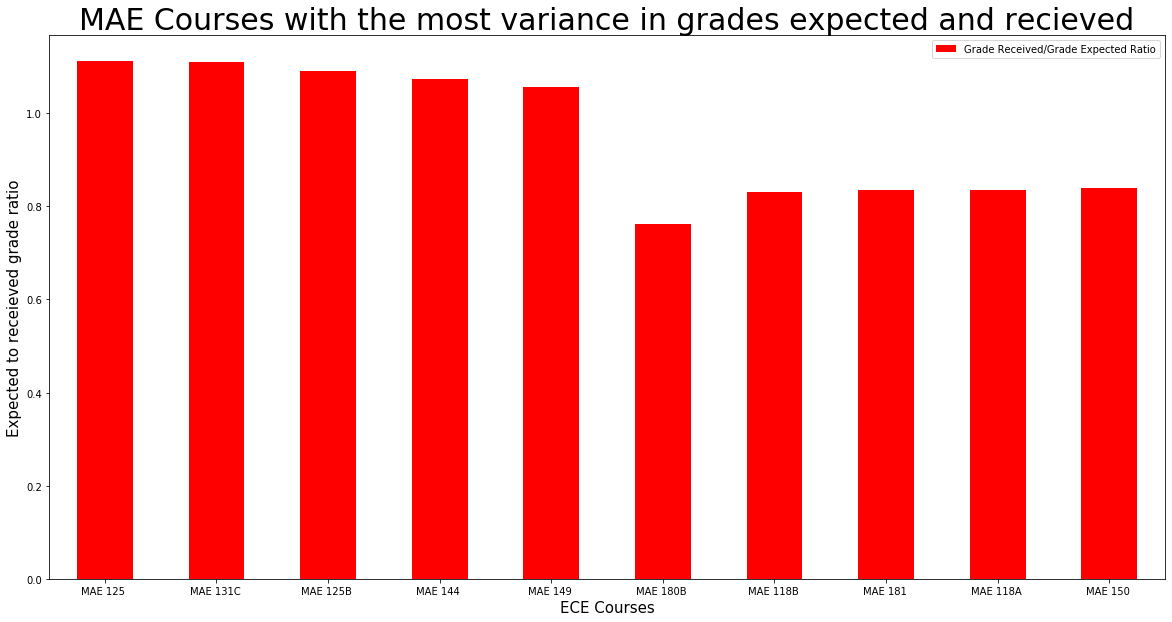

In [19]:
mae_over_the_average_df.reset_index(inplace=True)
mae_below_the_average_df.reset_index(inplace=True)
top5_mae_df = pd.DataFrame()
last5_mae_df = pd.DataFrame()
question_3_mae_df = pd.DataFrame()
e = mae_over_the_average_df.nlargest(5, "Grade Received/Grade Expected Ratio")
f = mae_below_the_average_df.nsmallest(5, "Grade Received/Grade Expected Ratio")
top5_mae_df = top5_mae_df.append(e)
last5_mae_df = last5_mae_df.append(f)
question_3_mae_df = question_3_mae_df.append(top5_mae_df)
question_3_mae_df = question_3_mae_df.append(last5_mae_df)
ax = question_3_mae_df.plot.bar(x='Course', y='Grade Received/Grade Expected Ratio', rot=0, figsize = (20,10), title='MAE Courses with the most variance in grades expected and recieved', color='red')
ax.title.set_size(30)
ax.set_xlabel('ECE Courses', fontsize=15)
ax.set_ylabel('Expected to receieved grade ratio', fontsize=15)

Text(0, 0.5, 'Expected to receieved grade ratio')

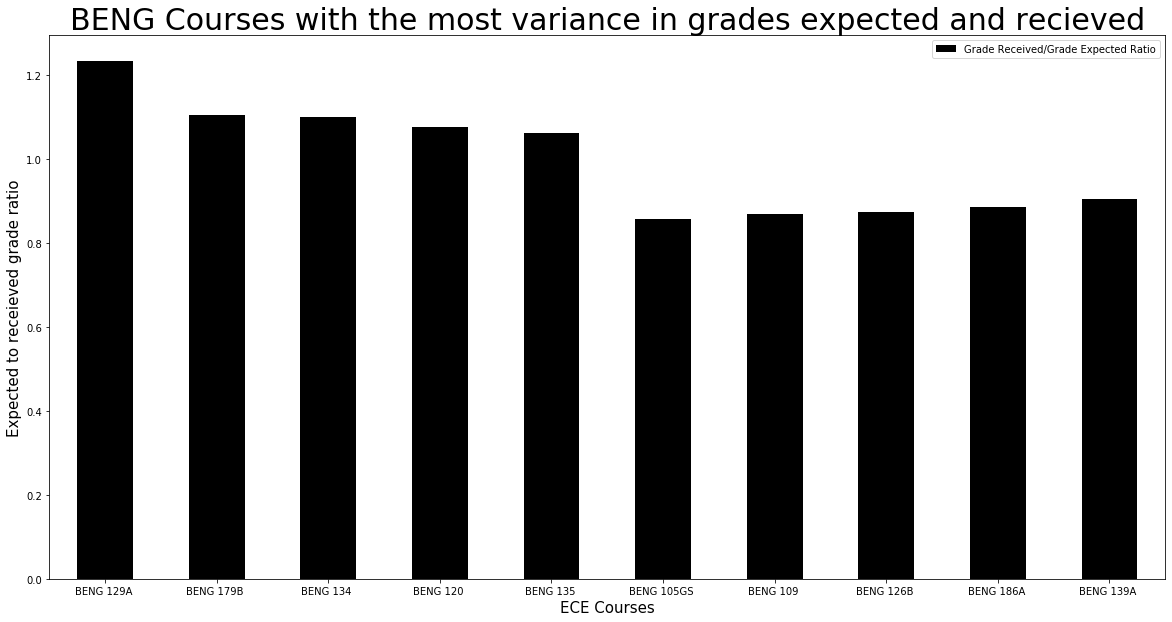

In [20]:
beng_over_the_average_df.reset_index(inplace=True)
beng_below_the_average_df.reset_index(inplace=True)
top5_beng_df = pd.DataFrame()
last5_beng_df = pd.DataFrame()
question_3_beng_df = pd.DataFrame()
g = beng_over_the_average_df.nlargest(5, "Grade Received/Grade Expected Ratio")
h = beng_below_the_average_df.nsmallest(5, "Grade Received/Grade Expected Ratio")
top5_beng_df = top5_beng_df.append(g)
last5_beng_df = last5_beng_df.append(h)
question_3_beng_df = question_3_beng_df.append(top5_beng_df)
question_3_beng_df = question_3_beng_df.append(last5_beng_df)
ax = question_3_beng_df.plot.bar(x='Course', y='Grade Received/Grade Expected Ratio', rot=0, figsize = (20,10), title='BENG Courses with the most variance in grades expected and recieved', color='black')
ax.title.set_size(30)
ax.set_xlabel('ECE Courses', fontsize=15)
ax.set_ylabel('Expected to receieved grade ratio', fontsize=15)

## Question 4
How each of the department is rated based on the course ratings including enrollments, evaluations made, hours studied, grades received, recommended course and professor percentage?

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Read in the .csv file
df = pd.read_csv('Preprocess_Completed.csv')
df.set_index(["Department"], inplace=True)

# Split the dataframes based on deartment
ece = df.loc["ECE"]
cse = df.loc["CSE"]
mae = df.loc["MAE"]
beng = df.loc["BENG"]

ece.reset_index(inplace=True)
cse.reset_index(inplace=True)
mae.reset_index(inplace=True)
beng.reset_index(inplace=True)

# Get the sum of the 'Enroll' column for each department
ece_enroll = ece['Enroll'].sum()
cse_enroll = cse['Enroll'].sum()                                                                                 
mae_enroll = mae['Enroll'].sum()                                                                                 
beng_enroll = beng['Enroll'].sum() 

# Get the sum of the 'Evals Made' column for each department
ece_evals = ece['Evals Made'].sum()
cse_evals = cse['Evals Made'].sum()                                                                                 
mae_evals = mae['Evals Made'].sum()                                                                                 
beng_evals = beng['Evals Made'].sum() 

# Find the ratio by dividing the evals with the enrolled
ece_ratio = ece_evals / ece_enroll
cse_ratio = cse_evals / cse_enroll                                                                                       
mae_ratio = mae_evals / mae_enroll                                                                                     
beng_ratio = beng_evals / beng_enroll

# Get the sum of the 'Study Hrs/wk' column for each department
ece_study = ece['Study Hrs/wk'].sum()
cse_study = cse['Study Hrs/wk'].sum()                                                                                 
mae_study = mae['Study Hrs/wk'].sum()                                                                                 
beng_study = beng['Study Hrs/wk'].sum() 

# Get the sum of the 'Avg Grade Received' column for each department
ece_grade = ece['Avg Grade Received'].sum()
cse_grade = cse['Avg Grade Received'].sum()                                                                                 
mae_grade = mae['Avg Grade Received'].sum()                                                                                 
beng_grade = beng['Avg Grade Received'].sum()

# Get the sum of the 'Rcmnd Class' column for each department
ece_class = ece['Rcmnd Class'].sum()
cse_class = cse['Rcmnd Class'].sum()                                                                                 
mae_class = mae['Rcmnd Class'].sum()                                                                                 
beng_class = beng['Rcmnd Class'].sum()

# Get the sum of the 'Rcmnd Instr' column for each department
ece_instr = ece['Rcmnd Instr'].sum()
cse_instr = cse['Rcmnd Instr'].sum()                                                                                 
mae_instr = mae['Rcmnd Instr'].sum()                                                                                 
beng_instr = beng['Rcmnd Instr'].sum()

# Find the averages for each department by dividing by the number of rows
ece_study_avg = ece_study / len(ece)
ece_grade_avg = ece_grade / len(ece)
ece_class_avg = ece_class / len(ece)
ece_instr_avg = ece_instr / len(ece)

cse_study_avg = cse_study / len(cse)
cse_grade_avg = cse_grade / len(cse)
cse_class_avg = cse_class / len(cse)
cse_instr_avg = cse_instr / len(cse)

mae_study_avg = mae_study / len(mae)
mae_grade_avg = mae_grade / len(mae)
mae_class_avg = mae_class / len(mae)
mae_instr_avg = mae_instr / len(mae)

beng_study_avg = beng_study / len(beng)
beng_grade_avg = beng_grade / len(beng)
beng_class_avg = beng_class / len(beng)
beng_instr_avg = beng_instr / len(beng)

# Sum up all of the averages
ece_total = ece_grade_avg + ece_class_avg + ece_instr_avg - ece_study_avg 
cse_total = cse_grade_avg + cse_class_avg + cse_instr_avg - cse_study_avg
mae_total = mae_grade_avg + mae_class_avg + mae_instr_avg - mae_study_avg
beng_total = beng_grade_avg + beng_class_avg + beng_instr_avg - beng_study_avg

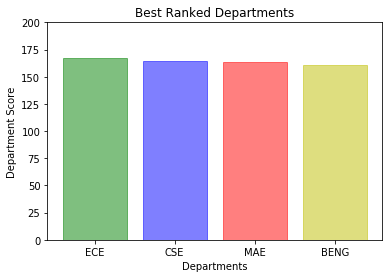

In [22]:
# Create a bar chart with each total
objects = ('ECE', 'CSE', 'MAE', 'BENG')
y_pos = np.arange(len(objects))
totals = [ece_total, cse_total, mae_total, beng_total]

bar_list = plt.bar(y_pos, totals, align='center', alpha=0.5)
bar_list[0].set_color('g')
bar_list[1].set_color('b')
bar_list[2].set_color('r')
bar_list[3].set_color('y')
plt.xticks(y_pos, objects)
plt.ylabel('Department Score')
plt.xlabel('Departments')
plt.title('Best Ranked Departments')
plt.ylim(0,200)

plt.show()

## Question 5
What percent of the professors in each department are overall recommended by the students? 

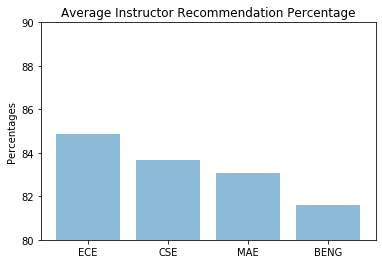

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the .csv file
df = pd.read_csv('Preprocess_Completed.csv')
df.set_index(['Department'], inplace=True)
# Split the dataframe into the different departments
ece = df.loc['ECE']
cse = df.loc['CSE']
mae = df.loc['MAE']                                                                                            
beng = df.loc['BENG']

ece.reset_index(inplace=True)
cse.reset_index(inplace=True)                                                                                        
mae.reset_index(inplace=True)                                                                                        
beng.reset_index(inplace=True)

# Get the sum of the 'Rcmnd Instr' column for each department
ece_total = ece['Rcmnd Instr'].sum()
cse_total = cse['Rcmnd Instr'].sum()                                                                                 
mae_total = mae['Rcmnd Instr'].sum()                                                                                 
beng_total = beng['Rcmnd Instr'].sum() 

# Find the average by dividing by the number of rows
ece_avg = ece_total / len(ece)
cse_avg = cse_total / len(cse)                                                                                       
mae_avg = mae_total / len(mae)                                                                                       
beng_avg = beng_total / len(beng)

# Create a bar chart with each average
objects = ('ECE', 'CSE', 'MAE', 'BENG')
y_pos = np.arange(len(objects))
avgs = [ece_avg, cse_avg, mae_avg, beng_avg]

# Create a bar chart with each average
objects = ('ECE', 'CSE', 'MAE', 'BENG')
y_pos = np.arange(len(objects))
avgs = [ece_avg, cse_avg, mae_avg, beng_avg]

plt.bar(y_pos, avgs, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentages')
plt.title('Average Instructor Recommendation Percentage')
plt.ylim(80,90)

plt.show()


## Question 6
What percent of the professors in each department are not recommended or have bad feedback?

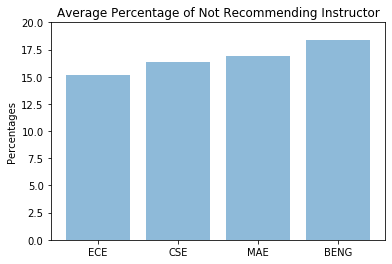

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read in the .csv file
df = pd.read_csv('Preprocess_Completed.csv')
df.set_index(['Department'], inplace=True)
# Split the dataframe into the different departments
ece = df.loc['ECE']
cse = df.loc['CSE']
mae = df.loc['MAE']                                                                                            
beng = df.loc['BENG']

ece.reset_index(inplace=True)
cse.reset_index(inplace=True)                                                                                        
mae.reset_index(inplace=True)                                                                                        
beng.reset_index(inplace=True)
# Get the sum of the 'Rcmnd Instr' column for each department
ece_total = ece['Rcmnd Instr'].sum()
cse_total = cse['Rcmnd Instr'].sum()                                                                                 
mae_total = mae['Rcmnd Instr'].sum()                                                                                 
beng_total = beng['Rcmnd Instr'].sum() 

# Find the average by dividing by the number of rows
ece_avg = ece_total / len(ece)
cse_avg = cse_total / len(cse)                                                                                       
mae_avg = mae_total / len(mae)                                                                                       
beng_avg = beng_total / len(beng)
# Create a bar chart with each average
objects = ('ECE', 'CSE', 'MAE', 'BENG')
y_pos = np.arange(len(objects))
# Subtract each average from 100 to get not recommended average
avgs = [100 - ece_avg, 100 - cse_avg, 100 - mae_avg, 100 - beng_avg]

plt.bar(y_pos, avgs, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentages')
plt.title('Average Percentage of Not Recommending Instructor')
plt.ylim(0,20)

plt.show()

## Question 7
What quarter has the highest grades in each department? Helpful in choosing the quarter at appropriate time!

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')


data = pd.read_csv('Preprocess_Completed.csv')
mae = data.loc[data['Department'] == 'MAE']
ece = data.loc[data['Department'] == 'ECE']
cse = data.loc[data['Department'] == 'CSE']
bio = data.loc[data['Department'] == 'BENG']

def find_avg_highest_gpa(data, dep):
    '''
    Group by term, average same course number and find all highest course in each terms. 
    After that, average all grade base on same quarter and do bar plot. 
    Note that S1, S2, S3 means summer section 1, 2 and 3; fa means fall, wi means winter, sp means spring

    :param:
      data(pd.DataFrame): whole dataset
      dep(str): department, use to plot
    :return:
      None
    '''
    assert isinstance(data, pd.DataFrame)
    assert isinstance(dep, str)
    high_gpa_over_term = data.groupby(by='Term')  # grouby term
    highest_grade_term = pd.DataFrame(columns=['Term','Avg Grade Received'])
    x_label = []  # save all quarter year
    for quarter, table1 in high_gpa_over_term:
        x_label.append(quarter)
        selected = table1.groupby(["Course Number"])  # groupby course number
        study_over_course = selected.agg({"Avg Grade Received": "mean"}).nlargest(1, "Avg Grade Received") # get mean of gpa for same course number different professor and find largest
        study_over_course['Term'] = quarter[:2]  # save first 2 character for fa, wi, sp, s1, s2 or s3
        highest_grade_term = highest_grade_term.append(study_over_course)

    high_gpa_over_term = highest_grade_term.groupby(by = 'Term')['Avg Grade Received'].mean()  # take average of grade in same quarter
    # plot
    ax = high_gpa_over_term.plot.bar(rot=0, title=dep + ' average highest GPA over quarter', figsize=(20,10))
    ax.title.set_size(20)
    ax.set_xlabel('Quarters', fontsize=16)
    ax.set_ylabel('Received Grades', fontsize=16)
    # add text on plot
    for x,y in zip(range(high_gpa_over_term.shape[0]), high_gpa_over_term.values):
        y = round(y,2)
        label = y
        ax.annotate(label, # this is the text
                   (x,y), # this is the point to label
                   textcoords="offset points", # how to position the text
                   xytext=(0,10), # distance from text to points (x,y)
                   ha='center')

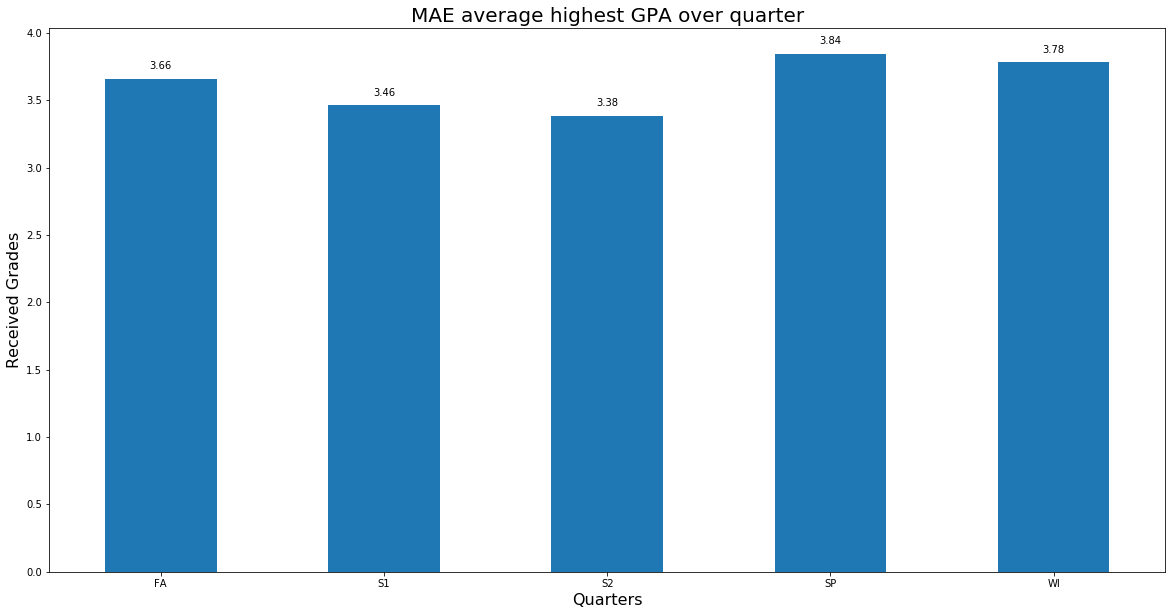

In [26]:
cur_dep = "MAE"
find_avg_highest_gpa(mae, cur_dep)

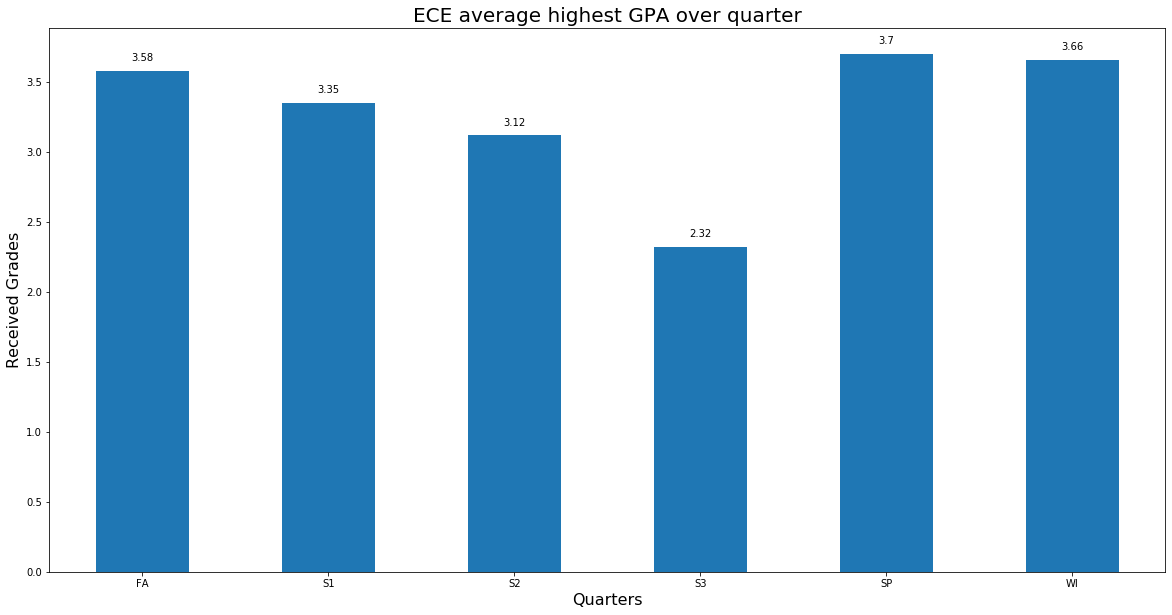

In [27]:
cur_dep = "ECE"
find_avg_highest_gpa(ece, cur_dep)

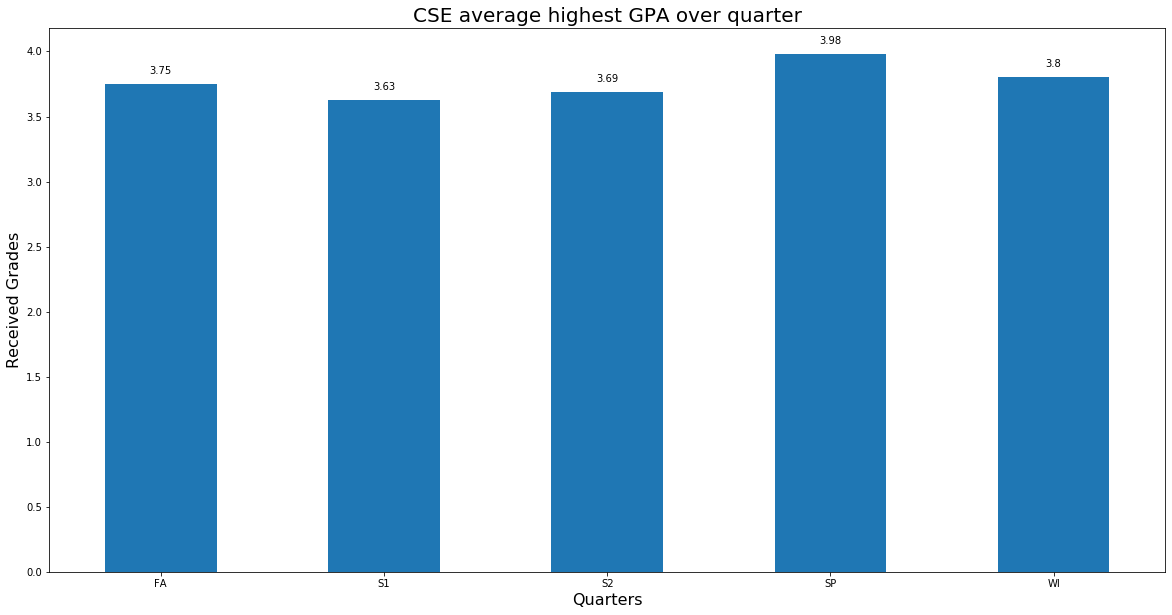

In [28]:
cur_dep = "CSE"
find_avg_highest_gpa(cse, cur_dep)

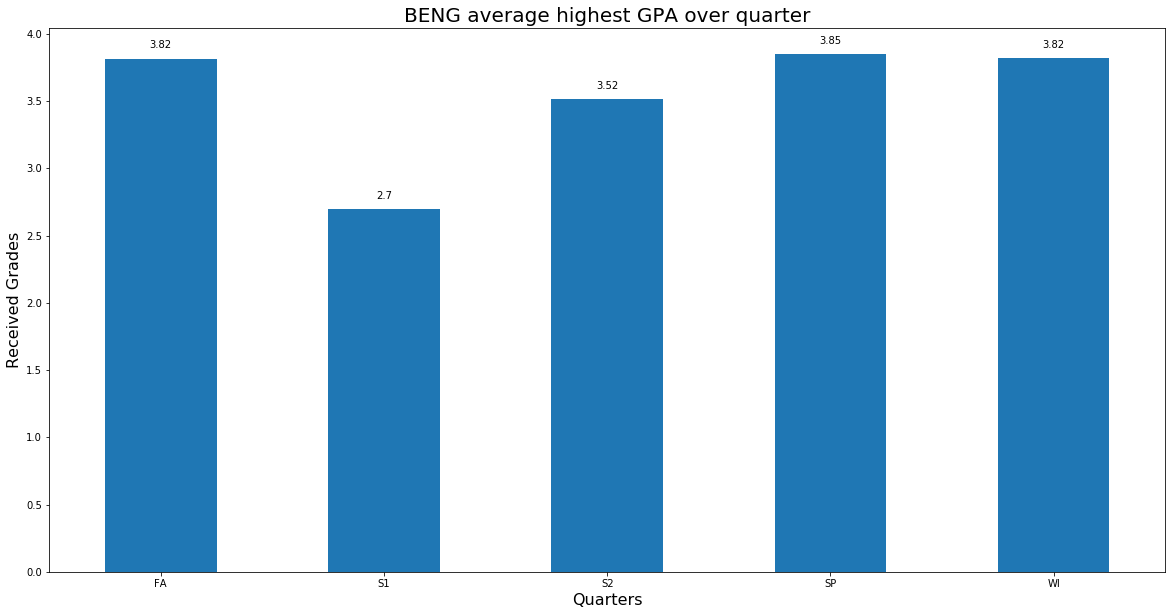

In [29]:
cur_dep = "BENG"
find_avg_highest_gpa(bio, cur_dep)

## Question 8
What quarter has the lowest grades in each department? Be cautious when choosing these subjects!

In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

data = pd.read_csv('Preprocess_Completed.csv')
mae = data.loc[data['Department'] == 'MAE']
ece = data.loc[data['Department'] == 'ECE']
cse = data.loc[data['Department'] == 'CSE']
bio = data.loc[data['Department'] == 'BENG']

def find_avg_smallest_gpa(data, dep):
    '''
    Group by term, average same course number and find all smallest course in each terms. 
    After that, average all grade base on same quarter and do bar plot. 
    Note that S1, S2, S3 means summer section 1, 2 and 3; fa means fall, wi means winter, sp means spring

    :param:
      data(pd.DataFrame): whole dataset
      dep(str): department, use to plot
    :return:
      None
    '''
    assert isinstance(data, pd.DataFrame)
    assert isinstance(dep, str)
    high_gpa_over_term = data.groupby(by='Term')  # grouby term
    highest_grade_term = pd.DataFrame(columns=['Term','Avg Grade Received'])
    x_label = []  # save all quarter year
    for quarter, table1 in high_gpa_over_term:
        x_label.append(quarter)
        selected = table1.groupby(["Course Number"])  # groupby course number
        study_over_course = selected.agg({"Avg Grade Received": "mean"}).nsmallest(1, "Avg Grade Received") # get mean of gpa for same course number different professor and find smallest
        study_over_course['Term'] = quarter[:2]  # save first 2 character for fa, wi, sp, s1, s2 or s3
        highest_grade_term = highest_grade_term.append(study_over_course)

    high_gpa_over_term = highest_grade_term.groupby(by = 'Term')['Avg Grade Received'].mean()  # take average of grade in same quarter
    # plot
    ax = high_gpa_over_term.plot.bar(rot=0, title=dep + ' average highest GPA over quarter', figsize=(10,10))
    ax.title.set_size(20)
    ax.set_xlabel('Quarters', fontsize=16)
    ax.set_ylabel('Received Grades', fontsize=16)
    # add text on plot
    for x,y in zip(range(high_gpa_over_term.shape[0]), high_gpa_over_term.values):
        y = round(y,2)
        label = y
        ax.annotate(label, # this is the text
                   (x,y), # this is the point to label
                   textcoords="offset points", # how to position the text
                   xytext=(0,10), # distance from text to points (x,y)
                   ha='center')

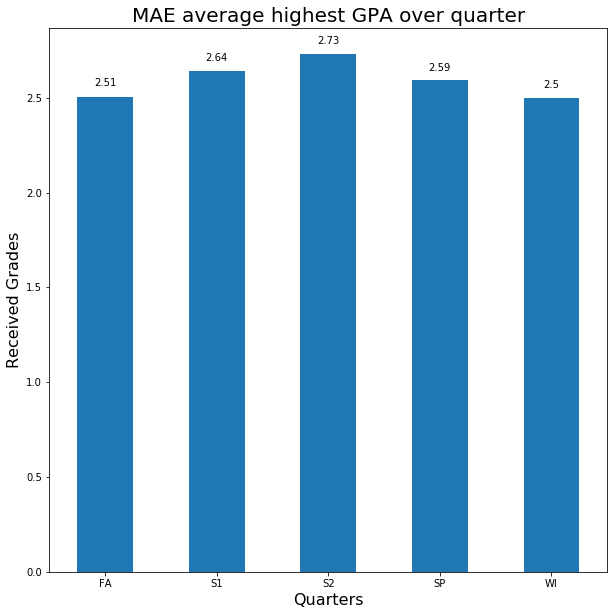

In [31]:
cur_dep = "MAE"
find_avg_smallest_gpa(mae, cur_dep)

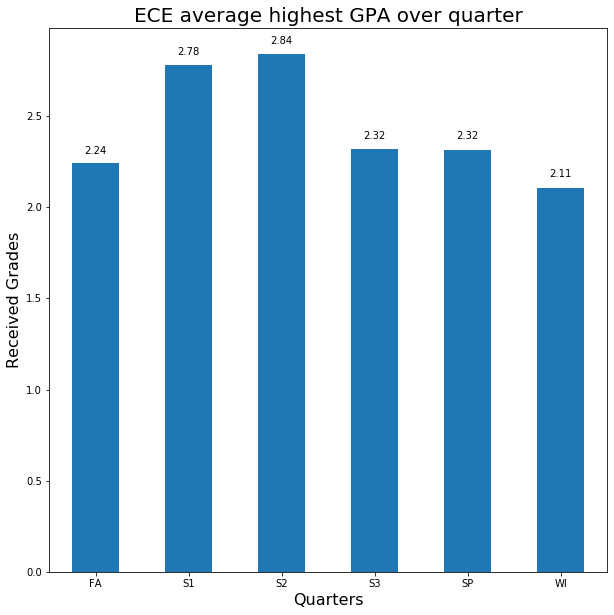

In [32]:
cur_dep = "ECE"
find_avg_smallest_gpa(ece, cur_dep)

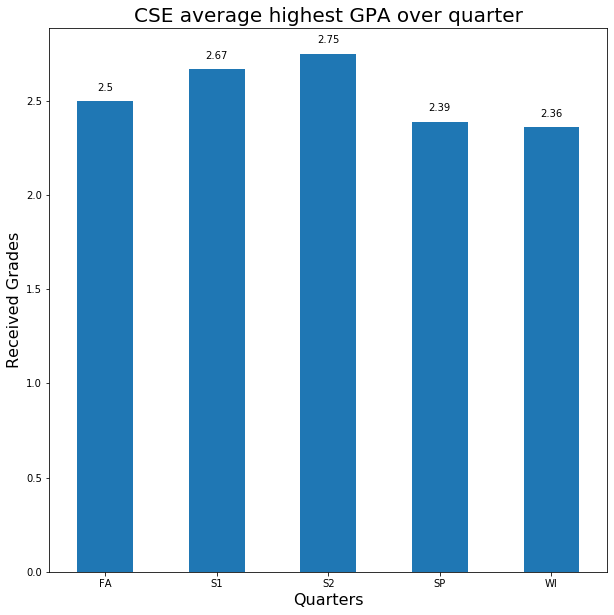

In [33]:
cur_dep = "CSE"
find_avg_smallest_gpa(cse, cur_dep)

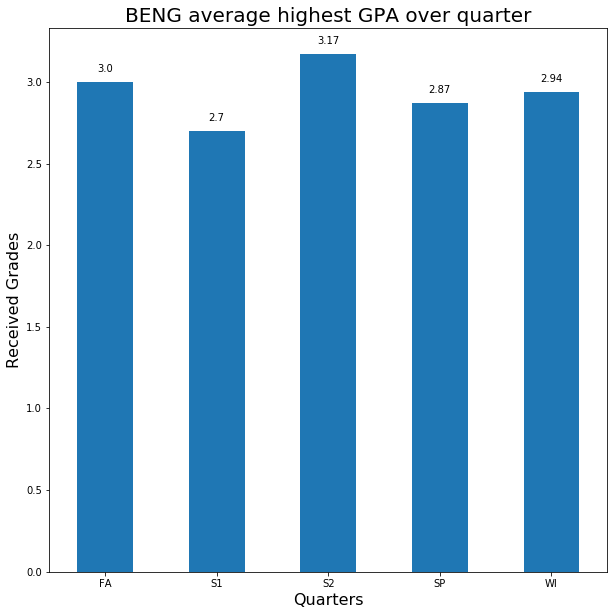

In [34]:

cur_dep = "BENG"
find_avg_smallest_gpa(bio, cur_dep)

## Question 9
Is it true that some classes are easier if taken during summer? 

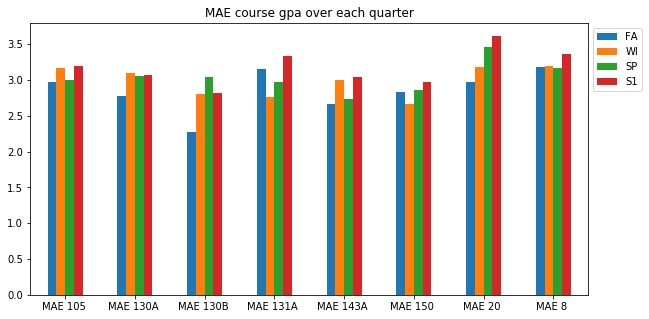

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('Preprocess_Completed.csv')
mae = data.loc[data['Department'] == 'MAE']
ece = data.loc[data['Department'] == 'ECE']
cse = data.loc[data['Department'] == 'CSE']
bio = data.loc[data['Department'] == 'BENG']

unique_course = mae.groupby('Course Number')  # groupby each course
data = {}
for course_num, table1 in unique_course:
    fall = table1.loc[mae['Term'].str.startswith('FA')]  # find all current course open in fall
    winter = table1.loc[mae['Term'].str.startswith('WI')]  # find all current course open in winter
    spring = table1.loc[mae['Term'].str.startswith('SP')]  # find all current course open in spring
    summer = table1.loc[mae['Term'].str.startswith('S1')]  # find all current course open in summer
    if fall.empty or winter.empty or spring.empty or summer.empty:  # if not open in all four quarter
        continue
    data[course_num] = [fall['Avg Grade Received'].mean(), winter['Avg Grade Received'].mean(), spring['Avg Grade Received'].mean(), summer['Avg Grade Received'].mean()]
compare_gpa = pd.DataFrame(data, index=['FA', 'WI', 'SP', 'S1']).transpose()
compare_gpa.plot.bar(rot = 0, figsize=(10,5), title='MAE course gpa over each quarter').legend(bbox_to_anchor=(1, 1))

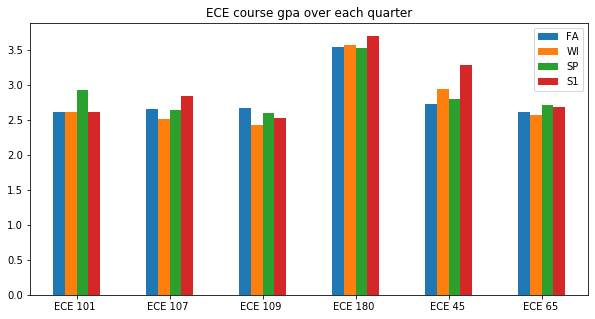

In [36]:
unique_course = ece.groupby('Course Number')  # groupby each course
data = {}
for course_num, table1 in unique_course:
    fall = table1.loc[ece['Term'].str.startswith('FA')]  # find all current course open in fall
    winter = table1.loc[ece['Term'].str.startswith('WI')]  # find all current course open in winter
    spring = table1.loc[ece['Term'].str.startswith('SP')]  # find all current course open in spring
    summer = table1.loc[ece['Term'].str.startswith('S1')]  # find all current course open in summer
    if fall.empty or winter.empty or spring.empty or summer.empty:  # if not open in all four quarter
        continue
    data[course_num] = [fall['Avg Grade Received'].mean(), winter['Avg Grade Received'].mean(), spring['Avg Grade Received'].mean(), summer['Avg Grade Received'].mean()]
compare_gpa = pd.DataFrame(data, index=['FA', 'WI', 'SP', 'S1']).transpose()
compare_gpa.plot.bar(rot = 0, figsize=(10,5), title='ECE course gpa over each quarter').legend(bbox_to_anchor=(1, 1))

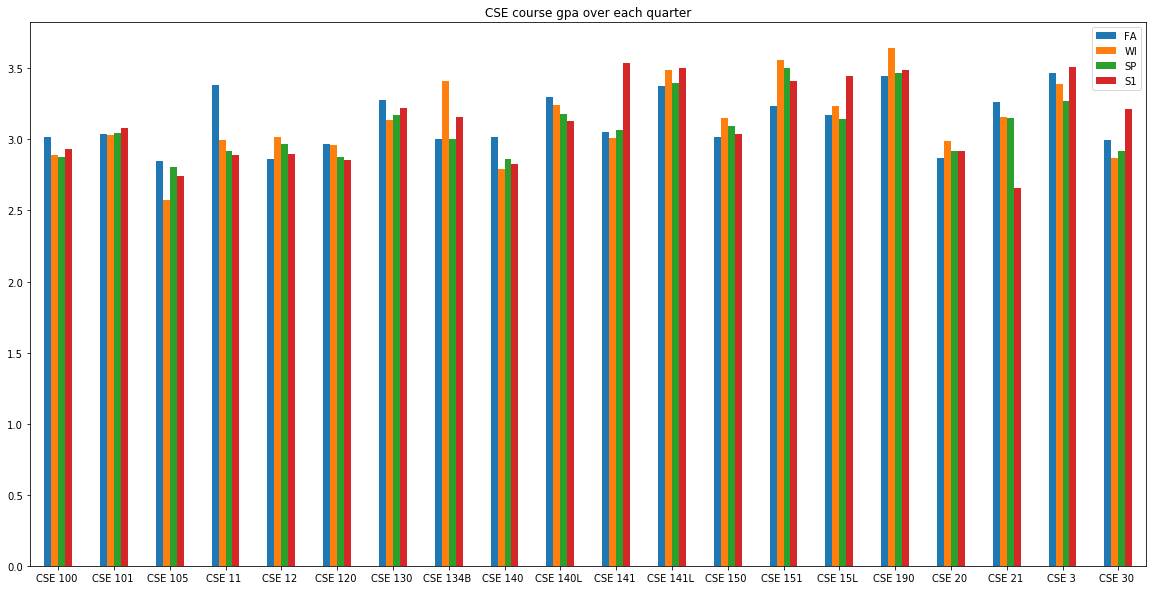

In [37]:
unique_course = cse.groupby('Course Number')  # groupby each course
data = {}
for course_num, table1 in unique_course:
    fall = table1.loc[cse['Term'].str.startswith('FA')]  # find all current course open in fall
    winter = table1.loc[cse['Term'].str.startswith('WI')]  # find all current course open in winter
    spring = table1.loc[cse['Term'].str.startswith('SP')]  # find all current course open in spring
    summer = table1.loc[cse['Term'].str.startswith('S1')]  # find all current course open in summer
    if fall.empty or winter.empty or spring.empty or summer.empty:  # if not open in all four quarter
        continue
    data[course_num] = [fall['Avg Grade Received'].mean(), winter['Avg Grade Received'].mean(), spring['Avg Grade Received'].mean(), summer['Avg Grade Received'].mean()]
compare_gpa = pd.DataFrame(data, index=['FA', 'WI', 'SP', 'S1']).transpose()
compare_gpa.plot.bar(rot = 0, figsize=(20,10), title='CSE course gpa over each quarter').legend(bbox_to_anchor=(1, 1))

In [38]:
unique_course = bio.groupby('Course Number')  # groupby each course
data = {}
for course_num, table1 in unique_course:
    fall = table1.loc[bio['Term'].str.startswith('FA')]  # find all current course open in fall
    winter = table1.loc[bio['Term'].str.startswith('WI')]  # find all current course open in winter
    spring = table1.loc[bio['Term'].str.startswith('SP')]  # find all current course open in spring
    summer = table1.loc[bio['Term'].str.startswith('S1')]  # find all current course open in summer
    if fall.empty or winter.empty or spring.empty or summer.empty:  # if not open in all four quarter
        continue
    data[course_num] = [fall['Avg Grade Received'].mean(), winter['Avg Grade Received'].mean(), spring['Avg Grade Received'].mean(), summer['Avg Grade Received'].mean()]
compare_gpa = pd.DataFrame(data, index=['FA', 'WI', 'SP', 'S1']).transpose()

## Question 10
Which are the top 10 courses that highest expected gpa and actual gpa have the variance in each deparment?

In [39]:
#Create Separate Files for each Department 
cln_df = pd.read_csv('Preprocess_Completed.csv')
seg_cln_df = cln_df.groupby('Department')
seg_cln_df.get_group("BENG").to_csv("Beng_clnd_data.csv")
seg_cln_df.get_group("CSE").to_csv("Cse_clnd_data.csv")
seg_cln_df.get_group("ECE").to_csv("Ece_clnd_data.csv")
seg_cln_df.get_group("MAE").to_csv("Mae_clnd_data.csv")

In [41]:
def term_to_numeric(term):
    '''
    This function converts the Quarter terms into a numeric date. Each quarter is 
    assigned a number equal to the middle month of that particular quarter. 
    Example Fall 2018 -> 2018-11-01
    '''
    assert isinstance(term,str)
    if(term[0:2] == 'SP'):
        num_date = pd.to_datetime('20' + term[-2:] + '-05-01')
    
    elif(term[0:2] == 'FA'):
        num_date = pd.to_datetime('20' + term[-2:] + '-11-01')

    elif(term[0:2] == 'WI'):
        num_date = pd.to_datetime('20' + term[-2:] + '-02-01')
    
    else:
        num_date = pd.to_datetime('20' + term[-2:] + '-08-01')

        
    return num_date

def compute_grade_deviation(df,top_dev=10,good_dev=5,neg_dev=5):
    '''
    The following function computes the grade deviation 
    1. Difference of Expected grade - Actual grade 
    2. Expected grade - Actual grade
    3. List the top subjects in the current department with most abs deviation
    4. List the top_dev subjects with most difference
    5. List the good_dev, neg_dev course with most positive deviation and negative deviation
    
    Input: Data frame with Course Number, Expected Grade and Received Grade
    Ouput: Data frame with top_dev number of courses and their deviations
    '''
    assert isinstance(df,pd.DataFrame) and isinstance(good_dev,int) \
            and isinstance(top_dev,int) and isinstance(neg_dev,int)
    assert good_dev > 0 and top_dev > 0 and neg_dev > 0
    
    df['Grade_dev_abs'] = np.absolute(df['Avg Grade Expected'] - df['Avg Grade Received'])    
    df_sel = df[['Course Number','Grade_dev_abs','Term']]
    df_sel = df_sel.sort_values(by=['Grade_dev_abs'],ascending=False)
    df_sel.index = np.arange(1, len(df_sel)+1)
    unique_course = []
    unique_deviation = []
    i,j = (0,0)
    #Get unique courses
    while(i < top_dev):
        course = df_sel['Course Number'].iloc[j]
        deviation = df_sel['Grade_dev_abs'].iloc[j]
        j = j + 1
        if(course in unique_course):
            pass
        else:
            unique_course.append(course)
            unique_deviation.append(deviation)
            i = i + 1
    d = {'Course':unique_course,'Grade_Deviation':unique_deviation}
    
    return pd.DataFrame(d,index=range(1,top_dev+1))

In [42]:
#Top 10 deviating Subjects in ECE
ece_grp = pd.read_csv('Ece_clnd_data.csv')
dev_grade_df = compute_grade_deviation(ece_grp)
dev_grade_df

,Course,Grade_Deviation
1,ECE 156,1.42
2,ECE 65,1.37
3,ECE 164,1.32
4,ECE 35,1.23
5,ECE 109,1.18
6,ECE 30,1.18
7,ECE 154B,1.10
8,ECE 101,1.08
9,ECE 102,1.08
10,ECE 15,1.04


In [43]:
#Top 10 deviating courses in CSE
cse_grp = pd.read_csv('Cse_clnd_data.csv')
compute_grade_deviation(cse_grp)

,Course,Grade_Deviation
1,CSE 140,1.32
2,CSE 8AL,1.11
3,CSE 11,1.04
4,CSE 140L,1.03
5,CSE 191,1.00
6,CSE 20,1.00
7,CSE 131,0.96
8,CSE 127,0.95
9,CSE 105,0.94
10,CSE 5A,0.93


In [44]:
#Top 10 deviating courses in BENG
beng_grp = pd.read_csv('Beng_clnd_data.csv')
compute_grade_deviation(beng_grp)

,Course,Grade_Deviation
1,BENG 100,0.76
2,BENG 140A,0.72
3,BENG 140B,0.71
4,BENG 186A,0.71
5,BENG 129A,0.70
6,BENG 109,0.68
7,BENG 101,0.68
8,BENG 126B,0.66
9,BENG 181,0.65
10,BENG 134,0.63


In [45]:
#Top 10 deviating courses in MAE
mae_grp = pd.read_csv('Mae_clnd_data.csv')
compute_grade_deviation(mae_grp)

,Course,Grade_Deviation
1,MAE 110A,1.23
2,MAE 20,1.11
3,MAE 140,1.09
4,MAE 130B,1.05
5,MAE 105,1.05
6,MAE 101C,1.03
7,MAE 120,1.03
8,MAE 104,1.02
9,MAE 118B,1.02
10,MAE 119,1.02


In [46]:
#Adding a column Term_numeric to get sense of time for Quarter Analysis
ece_grp['Term_numeric'] = ece_grp['Term'].apply(term_to_numeric)

## Deviation Analysis for ECE 143
How is ECE 143 doing over the quarters? 

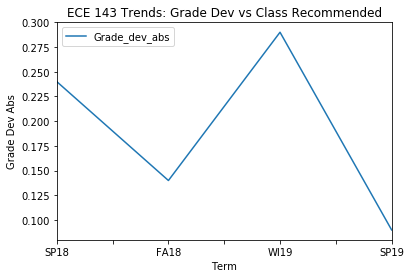

In [47]:
ece_subjects = ece_grp.groupby(['Course Number'])
ece_143 = ece_subjects.get_group('ECE 143 ')
ece_143 = ece_143.sort_values(by=['Term_numeric'],ascending=True)
ece_143
ax = plt.gca()
ece_143.plot(x="Term",y="Grade_dev_abs",ax=ax,title="ECE 143 Trends: Grade Dev vs Class Recommended")
ax.set_ylabel('Grade Dev Abs')
plt.show()

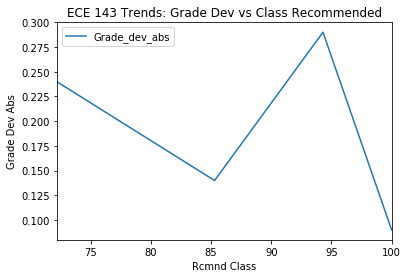

In [48]:
ax = plt.gca()
ece_143.plot(kind='line',x="Rcmnd Class",y="Grade_dev_abs",ax=ax,title="ECE 143 Trends: Grade Dev vs Class Recommended")
ax.set_ylabel('Grade Dev Abs')
plt.show()

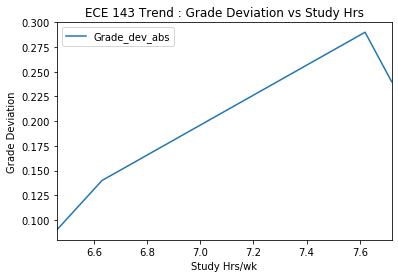

In [49]:
ax = plt.gca()
ece_143_hrs_stdy = ece_143.sort_values(by=['Study Hrs/wk'],ascending=True)
ece_143_hrs_stdy.plot(kind='line',x="Study Hrs/wk",y="Grade_dev_abs",ax=ax,title='ECE 143 Trend : Grade Deviation vs Study Hrs')
ax.set_ylabel('Grade Deviation')
plt.show()

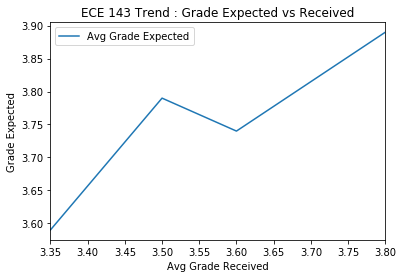

In [50]:
ece_143_ac_vs_rc = ece_143.sort_values(by=['Avg Grade Received'],ascending=True)
ax = plt.gca()
ece_143_ac_vs_rc.plot(kind='line',x="Avg Grade Received",y="Avg Grade Expected",ax=ax,title='ECE 143 Trend : Grade Expected vs Received')
ax.set_ylabel('Grade Expected')
plt.show()

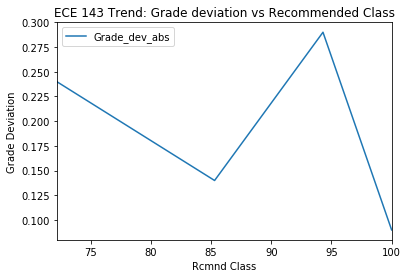

In [51]:
ece_143_prof_rcmd = ece_143.sort_values(by=['Rcmnd Class'],ascending=True)
ax = plt.gca()
ece_143_prof_rcmd.plot(kind='line',x="Rcmnd Class",y="Grade_dev_abs",ax=ax,title='ECE 143 Trend: Grade deviation vs Recommended Class')
ax.set_ylabel('Grade Deviation')
plt.show()

## Question 11
Is there a relationship between grade received and whether the students recommend the professor? (do you beleive that obviously high grades probably means better recommendations? No that's always not true!)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Preprocess_Completed.csv')
mae = data.loc[data['Department'] == 'MAE']
ece = data.loc[data['Department'] == 'ECE']
cse = data.loc[data['Department'] == 'CSE']
bio = data.loc[data['Department'] == 'BENG']

def plot_corr(x,y, dep):
    '''
    Plot the scatter between x and y 

    :param:
      x(np.ndarray): x axis values
      y(np.ndarray): y axis values
      dep(str): title department
    :return:
      None
    '''
    assert isinstance(x, np.ndarray) and isinstance(y, np.ndarray)
    assert isinstance(dep, str)
    plt.figure(figsize=(10,5))
    plt.scatter(x, y)
    plt.title(dep + ' professor recomended and gpa relationship', fontsize=20)
    plt.xlabel('Recommended Instructor percentage %', fontsize=16)
    plt.ylabel('Average Grade Received', fontsize=16)
    plt.show()
def find_corr(data, gb_str, s1, s2, dep):
    '''
    Find correction between two columns s1, s2 in data with unique gb_str (grouby this string)

    :param:
      data(pd.DataFrame): whole dataset
      gb_str(str): groupby this columns
      s1(str): column 1 wants to do correction
      s2(str): column 2 wants to do correction
      dep(str): department, use to plot
    :return:
      corr(pd.DataFrame): correction between s1, s2
    '''
    assert isinstance(data, pd.DataFrame)
    assert isinstance(gb_str, str)
    assert isinstance(s1, str)
    assert isinstance(s2, str)
    assert isinstance(dep, str)
    assert s1 in data.columns and s2 in data.columns and gb_str in data.columns
    unique_prof = data.groupby(by=gb_str)[s1,s2].mean().sort_values(by=s1)
    rmnd_prof = unique_prof[s1].values
    gpa = unique_prof[s2].values
    corr = unique_prof.corr(method='pearson')
    plot_corr(rmnd_prof, gpa, dep)
    return corr
gb_str = 'Instructor'
s1 = 'Rcmnd Instr'
s2 = 'Avg Grade Received'

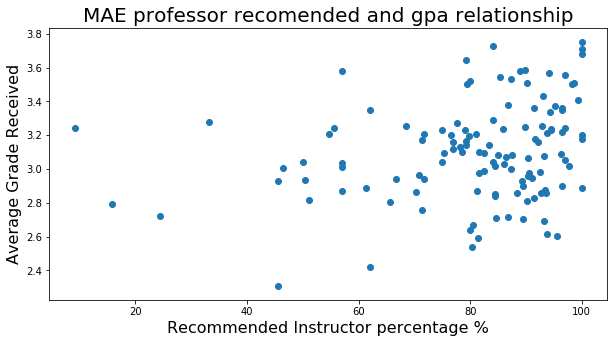

,Rcmnd Instr,Avg Grade Received
Rcmnd Instr,1.000000,0.248562
Avg Grade Received,0.248562,1.000000


In [53]:
cur_dep = "MAE"
find_corr(mae, gb_str, s1, s2, cur_dep)

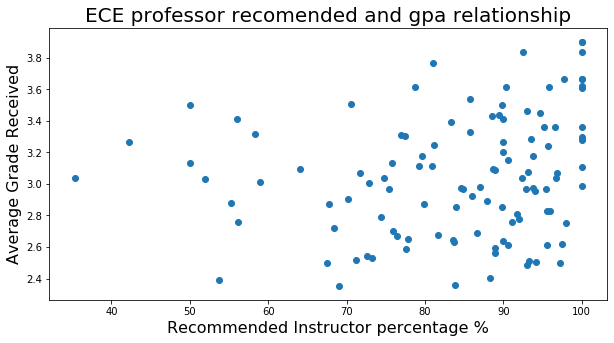

,Rcmnd Instr,Avg Grade Received
Rcmnd Instr,1.000000,0.196777
Avg Grade Received,0.196777,1.000000


In [54]:
cur_dep = "ECE"
find_corr(ece, gb_str, s1, s2, cur_dep)

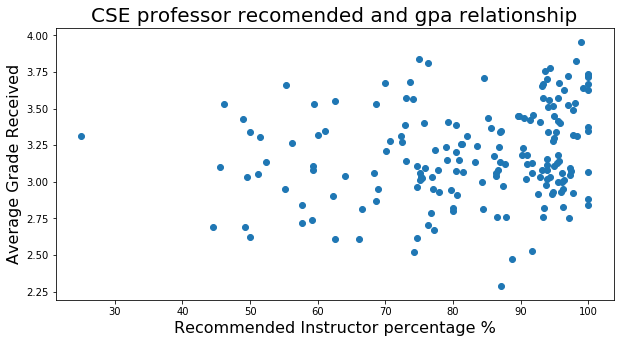

,Rcmnd Instr,Avg Grade Received
Rcmnd Instr,1.000000,0.197862
Avg Grade Received,0.197862,1.000000


In [55]:
cur_dep = "CSE"
find_corr(cse, gb_str, s1, s2, cur_dep)

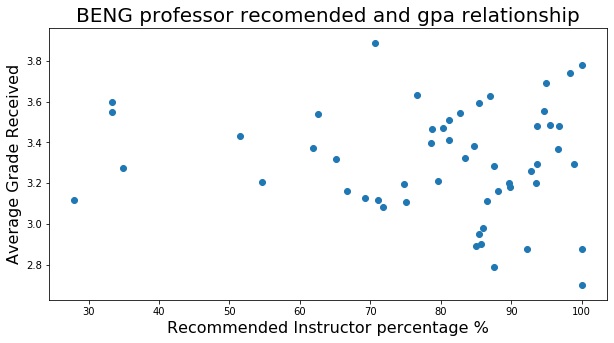

,Rcmnd Instr,Avg Grade Received
Rcmnd Instr,1.000000,-0.090562
Avg Grade Received,-0.090562,1.000000


In [56]:
cur_dep = "BENG"
find_corr(bio, gb_str, s1, s2, cur_dep)

## Question 12
How effective are each department in collecting the CAPE' data?

In [57]:
def get_feedback(df):
    '''
    This function computes the total enrolled students in each department
    and the number of feedbacks received in that deparment
    Input: Data Frame of each department with Columns having Enroll and Evals Made
    Output: Total evaluation received, total enrollment and percentage evals in the course 
    '''
    assert isinstance(df,pd.DataFrame) and ('Enroll' in df.columns) and ('Evals Made' in df.columns)
    total_enroll = int(df.agg({'Enroll' : 'sum'}))
    total_evalls = int(df.agg({'Evals Made' : 'sum'}))
    feedback_ratio = total_evalls / total_enroll
    return total_evalls,total_enroll,feedback_ratio*100

Text(0, 0.5, 'Cape Responce Percentage')

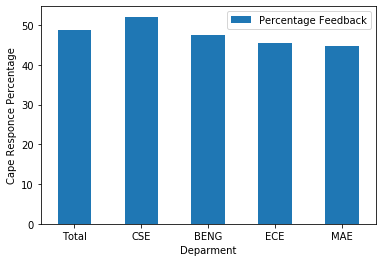

In [58]:
ece_tot_eval,ece_tot_enrol,ece_fdbk = get_feedback(ece_grp)
cse_tot_eval,cse_tot_enrol,cse_fdbk = get_feedback(cse_grp)
mae_tot_eval,mae_tot_enrol,mae_fdbk = get_feedback(mae_grp)
beng_tot_eval,beng_tot_enrol,beng_fdbk = get_feedback(beng_grp)
tot_fdbk = (ece_tot_eval + beng_tot_eval + cse_tot_eval + mae_tot_eval)*100 / (ece_tot_enrol + beng_tot_enrol + cse_tot_enrol + mae_tot_enrol) 
values = [tot_fdbk,cse_fdbk,beng_fdbk,ece_fdbk,mae_fdbk]
deparment = 'Deparment'
feedback = 'Percentage Feedback'
deparment_names = ['Total','CSE','BENG','ECE','MAE']
fdbk_df = pd.DataFrame({deparment : deparment_names, feedback : values})
fdbk_bar_plot = fdbk_df.plot(x = deparment,y = feedback,kind='bar',xticks=[])
fdbk_bar_plot.set_ylabel('Cape Responce Percentage')


## Research Trends in ECE
We classified the course in ECE into 6 specializations. And we try to see how the enrollment in each of the courses change over years (quarters).
The Specializations are 
    1. Electronic Circuits
    2. Signal Processing and Communication Systems
    3. Optics
    4. Software and Machine Learning
    5. Materials
    6. Power Electronics

In [59]:
ece_df = pd.read_csv('Ece_clnd_data.csv')
ece_subjects = ece_df['Course Number'].unique()
#This file contains the data for each course once they are divided into specializations
ece_special = pd.read_csv('Research.csv') 

In [60]:
#Get lookup table index for each value in the data set
def getIndexes(dfobj, value):
    ''' Get the index where the Subject (value) occurs in the look up table
    This value is then used to get the specialization from the lookup table constructed
    Input: Data Frame of the ECE department specialization lookup table along with Course detials
    Ouput: Is a list which contains the positions where the value is found in the look up table
    And looking for teh column Major in the lookup can help us construct the specializations
    '''
    assert isinstance(dfobj,pd.DataFrame)
    listofpos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfobj.isin([value])
    # Get list of columns that contains the value
    seriesobj = result.any()
    columnnames = list(seriesobj[seriesobj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnnames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listofpos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listofpos

In [61]:
ece_df['Major'] = ece_df['Course Number']
for i in range(len(ece_df)):
    index = getIndexes(ece_special,ece_df['Course Number'].iloc[i])
    spec_index = index[0][0]
    ece_df['Major'].iloc[i] = ece_special['Major'].iloc[spec_index]
ece_df.head()

,Unnamed: 0,Department,Course Number,Instructor,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Major
0,1921,ECE,ECE 100,"Abd El-Messih, Andrew Saad",WI19,43,40,76.9,74.4,9.00,3.16,2.79,sip
1,1922,ECE,ECE 100,"Coles, William A.",FA09,57,39,68.4,47.4,7.22,3.11,2.18,sip
2,1923,ECE,ECE 100,"Cruz, Rene L",WI13,77,38,80.0,31.4,10.03,3.00,2.68,sip
3,1924,ECE,ECE 100,"Kante, Boubacar",WI14,52,24,63.6,22.7,8.05,3.10,2.54,sip
4,1925,ECE,ECE 100,"Kante, Boubacar",WI15,101,75,90.5,89.2,9.05,3.20,2.65,sip


In [62]:
#Write into a file for future use
ece_df.to_csv('ece_data_with_specialization.csv')

In [63]:
def get_specialization(specialization):
    '''
    The following function renames the input string received into appropriate names for the 
    specializations.
    '''
    assert isinstance(specialization,str)
    if(specialization == 'ecs'):
        specialization = 'Electronic Circuits'
    elif(specialization == 'sm'):
        specialization = 'Software and ML'
    elif(specialization == 'sip'):
        specialization = 'Signal Processing'
    elif(specialization == 'ener'):
        specialization = 'Power Electronics'
    elif(specialization == 'mat'):
        specialization = 'Materials'
    elif(specialization == 'op'):
        specialization = 'Optics'

    return specialization
ece_df['Major'] = ece_df['Major'].apply(get_specialization)
ece_df['Term_numeric'] = ece_df['Term'].apply(term_to_numeric)
ece_df = ece_df.sort_values(by=['Term_numeric'],ascending=True)

In [64]:
#Take each specialization and return data frame with Term, Term_numeric and Enrollment and Evals Made
def analyse_specialization(sip):
    '''
    This function analyses the enrollment trend in each 
    major specialization in ECE department
    Input: Data frame of the ECE department With enrollment and Terms
    Ouput: Data frame with Total enrollment per quarter in the particular specialization
    '''
    assert isinstance(sip,pd.DataFrame)
    sip_term = sip.groupby(['Term','Term_numeric'])
    sip_df = sip_term.agg({'Enroll':'sum','Evals Made':'sum'})
    sip_df = sip_df.sort_values(by=['Term_numeric'])
    sip_df = sip_df.reset_index()

    return sip_df

In [65]:
#Grp by Major
main_ece_special_grp = ece_df.groupby(['Major'])

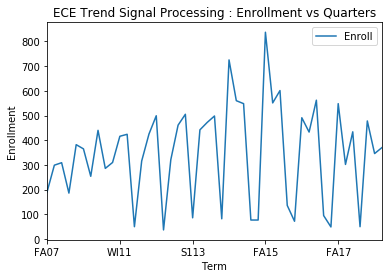

In [66]:
sip = main_ece_special_grp.get_group('Signal Processing')
sip_df = analyse_specialization(sip)
sip_df_plot = sip_df.plot(x='Term',y='Enroll',title='ECE Trend Signal Processing : Enrollment vs Quarters')
sip_df_plot.set_ylabel('Enrollment')
plt.savefig('sip_trend.png')

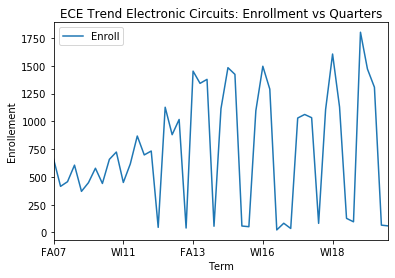

In [67]:
ecs = main_ece_special_grp.get_group('Electronic Circuits')
ecs_df = analyse_specialization(ecs)
ecs_df_plot = ecs_df.plot(x='Term',y='Enroll',title='ECE Trend Electronic Circuits: Enrollment vs Quarters')
ecs_df_plot.set_ylabel('Enrollement')
plt.savefig('ecs_trend.png')

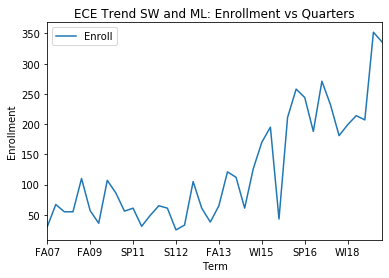

In [68]:
sw = main_ece_special_grp.get_group('Software and ML')
sw_df = analyse_specialization(sw)
sw_df_plot = sw_df.plot(x='Term',y='Enroll',title='ECE Trend SW and ML: Enrollment vs Quarters')
sw_df_plot.set_ylabel('Enrollment')
plt.savefig('sw_ml_trend.png')

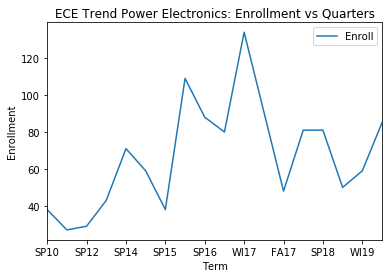

In [69]:
pe = main_ece_special_grp.get_group('Power Electronics')
pe_df = analyse_specialization(pe)
pe_df_plot = pe_df.plot(x='Term',y='Enroll',title='ECE Trend Power Electronics: Enrollment vs Quarters')
pe_df_plot.set_ylabel('Enrollment')
plt.savefig('pe_trend.png')

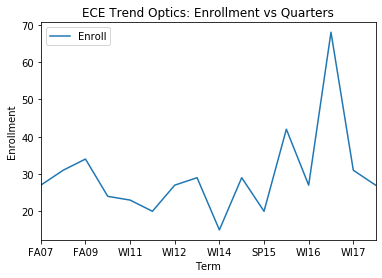

In [70]:
op = main_ece_special_grp.get_group('Optics')
op_df = analyse_specialization(op)
op_df_plot = op_df.plot(x='Term',y='Enroll',title='ECE Trend Optics: Enrollment vs Quarters')
op_df_plot.set_ylabel('Enrollment')
plt.savefig('op_trend.png')

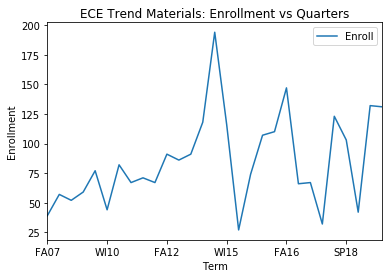

In [71]:
mat = main_ece_special_grp.get_group('Materials')
mat_df = analyse_specialization(mat)
mat_df_plot = mat_df.plot(x='Term',y='Enroll',title='ECE Trend Materials: Enrollment vs Quarters')
mat_df_plot.set_ylabel('Enrollment')
plt.savefig('mat_trend.png')

# Conclusion

We have analyzed the CAPE's data available from 2007 to 2019 Summer Quarter. And have answered some intruiging questions about how the students are experiencing the education at UC San Diego and also have developed some insights on how each departments are getting rated by the students evaluation on different aspects over the years. And the study done also provides some insights into how the grades vary based on course, quarter the being offered and the department offering it. Also we have done observation on how the course quality of ECE 143 has been for the last two years and the course has promising prospects which is reflected by the ratings recieved and the trend is getting better every quarter. The overall trend in student enrollment in the ECE is observed and it can be seen that even though there is slight shift towards Machine Learning and Software the majority of the students still take core ECE courses!